## 1. Project Title: Cryptocurrency Price Forecasting with Machine Learning

This project aims to successfully forecast cryptocurrency prices for the purpose of financial responsibility.

---

## 2. Methodology

This project will be carried out using the __CRISP-DM__ methodology. This is one of the more popular data science methodologies and is characterized by six important phases, which are as follows:

1. _Business Understanding_,
2. _Data Understanding_,
3. _Data Preparation_,
4. _Data Modelling_,
5. _Model Evaluation_, and
6. _Model Deployment_.

It should be noted that these phases are usually recurrent in nature (i.e., some phases may be repeated). As such, they do not necessarily follow a linear progression.

---

## 3. Tools

The tools of use for this project include:

1. _Pandas_
2. _NumPy_
3. _Matplotlib_ & _Seaborn_
4. _Statsmodel_

#### 3.1. Pandas & NumPy

__Pandas__ is a Python library built upon the __NumPy__ library. The idea behind _Pandas_ is to be able to operate on text data, where _NumPy_ is best suited for numerical operations, irrespective of the fact that it can represent text to some degree.

#### 3.2. Matplotlib & Seaborn

__Matplotlib__ and __Seaborn__ are Python libraries for data visualization. Other alternatives include __Bokeh__ and __Plotly__.

#### 3.3. Statsmodel

__Statsmodel__ is a Python library for statistical data analysis and modeling. Unlike libraries like __Sci-kit Learn__, which is focused on more algorithmic models. data visualization.

---

<div align="center"><h1>Project Implementation via CRISP-DM</h1></div>

---

<div><h3>01. Business Understanding</h3></div>

__Quantum Investments__ is a well-known quantitative trading firm famed for its cutting-edge quantitative trading strategies and data-driven investment decisions. They aim to improve their financial decisions and operations by the application of machine learning to the task of forecasting cryptocurrency prices.g.

This would be an immense boon to them in the following ways:

1. _Provide insight into possible future directions of market prices_,
2. _Obtain an understanding of the important predictors of said market prices_.

In order to train the needed machine learning models, the IT team at _Quantum Investments_ will need data that records and describes the state of different cryptocurrency over time. Some of this information would include __market capitalization__, __cryptocurrency prices__, __total market value__ etcetera.

---

<div><h3>02. Data Understanding</h3></div>

With the _**Business Understanding**_ out of the way, the next step is to understand the data to be obtained and used for the task. This will involve the process of __*Exploratory Data Analysis (EDA)*__.

EDA is the process of sifting through data with the goal of extracting insights. These insights allow a better understanding of the available data and what can be done with it. They can also be used for guided preparation of the dataset in the appropriate manner. Just like regular analysis, EDA begins with a set of __questions__ and/or __hypotheses__. The EDA process will then prove or disprove these hypotheses, and hopefully, reveal other points of inquiry along the way.

The required libraries and packages are imported first. The EDA process is carried out here as shown below. The high-level steps to follow are:

1. Import the required libraries
2. Load in the dataset
3. Analyze and observe its properties.
   * Missing data
   * Inconsistent values
   * Low categorical cardinality
   * Feature correlations
   * Time series stationarity
4. Report on these properties and how they might affect our final solution.

<div align="center"><h3>2.1. Enter EDA Code Here</h3></div>

In [ ]:
# Import required utilities
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

from sklearn.neighbors import LocalOutlierFactor

In [ ]:
# Seed for reproducibility
SEED = np.random.seed(seed = 2023)

In [ ]:
# Import the dataset
data_path = "Cryptocurrency_History_Data.arff"

In [ ]:
def truncate_data(data):
    if data.isdigit():
        if "." in data:
            return float(data)
        return int(data)

    if "-" in data:
        data = data.replace(" ", "")

    return data

def truncate_row(row):
    return [truncate_data(d) for d in row]

In [ ]:
def read_data(path):
    with open(path, "r") as f:
        lines = f.readlines()

    ix = 0
    for (i, line) in enumerate(lines):
        if line.__contains__("@DATA"):
            ix = i
            break

    header = [l.split(" ")[1] for l in lines[:ix] if l.startswith("@ATTRIBUTE")]

    data = [truncate_row(l.replace("\n", "").strip().split(",")) for l in lines[ix+1:]]
    data = [l for l in data if len(l) == len(header)]


    # for i, line in enumerate(data):
    #     if len(line) != 17:
    #         print("Index:", i)

    return pd.DataFrame(data = data, columns = header)

In [ ]:
data = read_data(data_path)

In [ ]:
data.head(n = 5)

,trade_date,volume,price_usd,price_btc,market_cap,capitalization_change_1_day,USD_price_change_1_day,BTC_price_change_1_day,crypto_name,crypto_type,ticker,max_supply,site_url,github_url,minable,platform_name,industry_name
0,2016-01-01,36278900.0,434.33,1.0,6529299589.0,0.0,0.0,0.0,Bitcoin,0.0,BTC,21000000.0,https://bitcoin.org/,https://github.com/bitcoin/,1.0,XRP,'Proof of Work (PoW)'
1,2016-01-02,30096600.0,433.44,1.0,6517390487.0,-0.0018239478580617,-0.0020491331476066,0.0,Bitcoin,0.0,BTC,21000000.0,https://bitcoin.org/,https://github.com/bitcoin/,1.0,XRP,'Proof of Work (PoW)'
2,2016-01-03,39633800.0,430.01,1.0,6467429942.0,-0.0076657283462844,-0.0079134366925065,0.0,Bitcoin,0.0,BTC,21000000.0,https://bitcoin.org/,https://github.com/bitcoin/,1.0,XRP,'Proof of Work (PoW)'
3,2016-01-04,38477500.0,433.09,1.0,6515713340.0,0.0074656236608678,0.0071626241250203,0.0,Bitcoin,0.0,BTC,21000000.0,https://bitcoin.org/,https://github.com/bitcoin/,1.0,XRP,'Proof of Work (PoW)'
4,2016-01-05,34522600.0,431.96,1.0,6500393256.0,-0.0023512519966079,-0.0026091574499527,0.0,Bitcoin,0.0,BTC,21000000.0,https://bitcoin.org/,https://github.com/bitcoin/,1.0,XRP,'Proof of Work (PoW)'


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2382623 entries, 0 to 2382622
Data columns (total 17 columns):
 #   Column                       Dtype 
---  ------                       ----- 
 0   trade_date                   object
 1   volume                       object
 2   price_usd                    object
 3   price_btc                    object
 4   market_cap                   object
 5   capitalization_change_1_day  object
 6   USD_price_change_1_day       object
 7   BTC_price_change_1_day       object
 8   crypto_name                  object
 9   crypto_type                  object
 10  ticker                       object
 11  max_supply                   object
 12  site_url                     object
 13  github_url                   object
 14  minable                      object
 15  platform_name                object
 16  industry_name                object
dtypes: object(17)
memory usage: 309.0+ MB


##### Cardinality

In [ ]:
# Feature cardinality
data.nunique()

trade_date                        1759
volume                         1036898
price_usd                       402078
price_btc                      2053690
market_cap                     1551095
capitalization_change_1_day    1859661
USD_price_change_1_day         1551435
BTC_price_change_1_day         2099347
crypto_name                       4137
crypto_type                          3
ticker                            3813
max_supply                         650
site_url                          4025
github_url                        2430
minable                              3
platform_name                       41
industry_name                       44
dtype: int64

In [ ]:
data.shape

(2382623, 17)

#### Data summary

In [ ]:
# Describe data
data.describe(include="all")

,trade_date,volume,price_usd,price_btc,market_cap,capitalization_change_1_day,USD_price_change_1_day,BTC_price_change_1_day,crypto_name,crypto_type,ticker,max_supply,site_url,github_url,minable,platform_name,industry_name
count,2382623,2382623,2382623,2382623,2382623,2382623,2382623,2382623,2382623,2382623,2382623,2382623,2382623,2382623,2382623,2382623,2382623
unique,1759,1036898,402078,2053690,1551095,1859661,1551435,2099347,4137,3,3813,650,4025,2430,3,41,44
top,2020-10-20,0.0,2e-06,0.0,0.0,0.0,0.0,0.0,?,1.0,?,?,?,?,0.0,?,?
freq,3576,209666,11399,3499,416052,519845,216020,3902,158849,1247697,158849,1686445,161185,845307,1609043,856378,677403


##### Missing Values

In [ ]:
# Check for missing values
100 * data.isnull().sum() / len(data)

trade_date                     0.0
volume                         0.0
price_usd                      0.0
price_btc                      0.0
market_cap                     0.0
capitalization_change_1_day    0.0
USD_price_change_1_day         0.0
BTC_price_change_1_day         0.0
crypto_name                    0.0
crypto_type                    0.0
ticker                         0.0
max_supply                     0.0
site_url                       0.0
github_url                     0.0
minable                        0.0
platform_name                  0.0
industry_name                  0.0
dtype: float64

Based on the results of the data summary and the missing values. It would seem that the missing values are represented by ``?``. This can be verified below.

In [ ]:
data["platform_name"].value_counts()

platform_name
?                        856378
XRP                      407962
VITE                     137308
Ontology                  82991
'INT Chain'               82837
EOS                       79832
NEM                       69480
ICON                      68030
Waves                     45954
Wanchain                  38034
TomoChain                 37770
'Bitcoin Cash'            30344
BitShares                 29661
'Vechain [Token]'         29657
PIVX                      28175
'Polkadot [IOU]'          25772
Ardor                     25118
NuBits                    25101
undefined                 23841
'Binance Coin'            23383
Zilliqa                   22849
Komodo                    20498
'RSK Smart Bitcoin'       19756
'V Systems'               17949
Klaytn                    16354
Fusion                    16259
'Binance Chain'           15711
Chiliz                    15636
Tron                      14357
GXChain                   13566
Qtum                      

In [ ]:
data.loc[data["platform_name"] == "?"]

,trade_date,volume,price_usd,price_btc,market_cap,capitalization_change_1_day,USD_price_change_1_day,BTC_price_change_1_day,crypto_name,crypto_type,ticker,max_supply,site_url,github_url,minable,platform_name,industry_name
3492,2016-01-01,211767.0,0.005955,1.37107729146e-05,199716461.0,0.0,0.0,0.0,XRP,0.0,XRP,100000000000.0,https://xrpl.org/,https://github.com/ripple,0.0,?,'Financial Service'
3493,2016-01-02,278539.0,0.006065,1.39927094868e-05,203395183.0,0.018419723549978,0.018471872376154,0.020563142139939,XRP,0.0,XRP,100000000000.0,https://xrpl.org/,https://github.com/ripple,0.0,?,'Financial Service'
3494,2016-01-03,291723.0,0.006017,1.39926978442e-05,201799471.0,-0.0078453775377758,-0.0079142621599341,-8.320518169e-07,XRP,0.0,XRP,100000000000.0,https://xrpl.org/,https://github.com/ripple,0.0,?,'Financial Service'
3495,2016-01-04,310820.0,0.005958,1.3756955829e-05,199807683.0,-0.0098701348924745,-0.0098055509390062,-0.016847502734494,XRP,0.0,XRP,100000000000.0,https://xrpl.org/,https://github.com/ripple,0.0,?,'Financial Service'
3496,2016-01-05,381554.0,0.006044,1.39920362996e-05,202711354.0,0.014532329069648,0.01443437395099,0.01708811698869,XRP,0.0,XRP,100000000000.0,https://xrpl.org/,https://github.com/ripple,0.0,?,'Financial Service'
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2382618,2020-10-31,39594.53,0.04028,2.9228669348e-06,0.0,0.0,0.01307847082495,-0.0041580636369665,PlotX,1.0,PLOT,200000000.0,https://plotx.io/,https://github.com/plotx/smart-contracts,0.0,?,?
2382619,2020-11-01,15120.45,0.041831,3.0451091969e-06,0.0,0.0,0.038505461767627,0.04182272570905,PlotX,1.0,PLOT,200000000.0,https://plotx.io/,https://github.com/plotx/smart-contracts,0.0,?,?
2382620,2020-10-30,14383.05,1.58,0.0001166351210495,0.0,0.0,-0.076023391812865,-0.083433473421533,SableAssent,1.0,SAC1,6000000001.0,https://www.sableassent.com,https://attachments.office.net/owa/daryl40sabl...,0.0,?,?
2382621,2020-10-31,3720.08,1.5,0.000108845590919,0.0,0.0,-0.050632911392405,-0.066785459305568,SableAssent,1.0,SAC1,6000000001.0,https://www.sableassent.com,https://attachments.office.net/owa/daryl40sabl...,0.0,?,?


These ``?`` need to be replaced by the regular ``NaN``. This is done below:

In [ ]:
data.replace("?", np.nan, inplace = True)

Now, with the changes made, we can confirm the status of the dataset with respect to missing values.

In [ ]:
100 * data.isnull().sum() / len(data)

trade_date                      0.000000
volume                          0.000000
price_usd                       0.000000
price_btc                       0.000000
market_cap                      0.000000
capitalization_change_1_day     0.000000
USD_price_change_1_day          0.000000
BTC_price_change_1_day          0.000000
crypto_name                     6.666980
crypto_type                     6.666980
ticker                          6.666980
max_supply                     70.781026
site_url                        6.765023
github_url                     35.478001
minable                         6.666980
platform_name                  35.942656
industry_name                  28.430977
dtype: float64

As can be seen, more than half of the features are plauged with missing values. However, some features like `platform_name` and `github_link` are strongly plagued by this issue.

##### Cardinality

We can take a look at the number of values each feature can take.

In [ ]:
# Number of unique values per feature
data.nunique()

trade_date                        1759
volume                         1036898
price_usd                       402078
price_btc                      2053690
market_cap                     1551095
capitalization_change_1_day    1859661
USD_price_change_1_day         1551435
BTC_price_change_1_day         2099347
crypto_name                       4136
crypto_type                          2
ticker                            3812
max_supply                         649
site_url                          4024
github_url                        2429
minable                              2
platform_name                       40
industry_name                       43
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2382623 entries, 0 to 2382622
Data columns (total 17 columns):
 #   Column                       Dtype 
---  ------                       ----- 
 0   trade_date                   object
 1   volume                       object
 2   price_usd                    object
 3   price_btc                    object
 4   market_cap                   object
 5   capitalization_change_1_day  object
 6   USD_price_change_1_day       object
 7   BTC_price_change_1_day       object
 8   crypto_name                  object
 9   crypto_type                  object
 10  ticker                       object
 11  max_supply                   object
 12  site_url                     object
 13  github_url                   object
 14  minable                      object
 15  platform_name                object
 16  industry_name                object
dtypes: object(17)
memory usage: 309.0+ MB


In [ ]:
# Distribution of crypto types
data["crypto_type"].value_counts(normalize = True)

crypto_type
1.0    0.561072
0.0    0.438928
Name: proportion, dtype: float64

In [ ]:
# Distribution of crypto mineability
data["minable"].value_counts(normalize = True)

minable
0.0    0.723564
1.0    0.276436
Name: proportion, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


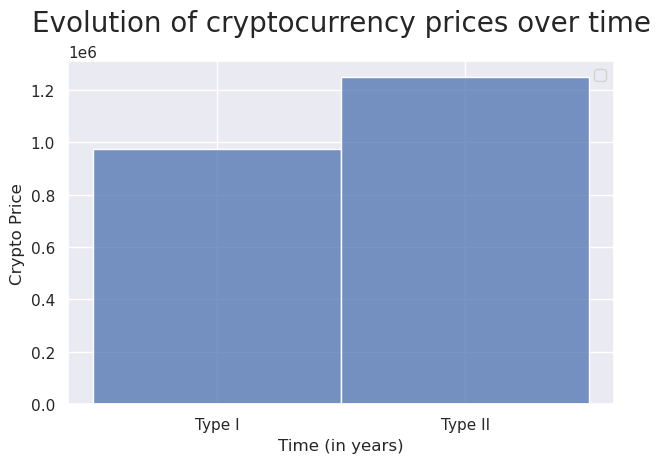

In [ ]:
# Line chart of crypto prices over time
sns.histplot(x = data["crypto_type"], bins = 10)

plt.xlabel("Time (in years)")
plt.ylabel("Crypto Price")

plt.xticks([0, 1], ["Type I", "Type II"])

plt.title("Evolution of cryptocurrency prices over time", fontsize = 20, pad = 10)

plt.legend()

plt.tight_layout()
plt.show()

The features with the lowest cardinality have a cardinalitty of `2`. This means there are no invariant features in the dataset. Also, the crytocurrencie are almost equally distributed between the cryptocurrency types. However, based on minability, there are very few minable crptocurrencies in the dataset.

##### Duplicate records

We eliminate duplicated rows.

In [ ]:
# Get the duplicated records
num_duplicated = len(data.loc[data.duplicated()])

In [ ]:
print(f"Number of duplicated records: {num_duplicated}.")

Number of duplicated records: 23.


There are very few duplicated records in the dataset. This is good, and also astounding, given that we are dealing with aroung \~ 2 million records in total.

In [ ]:
# Filter away the duplicated records
data = data.loc[~data.duplicated()]

In [ ]:
int_types = ["minable", "volume", "crypto_type", "max_supply"]
float_types = [
    "price_usd", "price_btc", "market_cap", "capitalization_change_1_day",
    "USD_price_change_1_day", "BTC_price_change_1_day"
]

In [ ]:
for column in int_types:
    # try:
    #     data[column] = pd.to_numeric(data[column], downcast = "integer", errors='coerce').astype(pd.Int64Dtype())
    # except:
    data[column] = data[column].astype("Float32")
    data[column] = data[column].astype("Int64")

for column in float_types:
    data[column] = data[column].astype(float)

data["trade_date"] = pd.to_datetime(data["trade_date"])

In [ ]:
data.head(n = 5)

,trade_date,volume,price_usd,price_btc,market_cap,capitalization_change_1_day,USD_price_change_1_day,BTC_price_change_1_day,crypto_name,crypto_type,ticker,max_supply,site_url,github_url,minable,platform_name,industry_name
0,2016-01-01,36278900,434.33,1.0,6.529300e+09,0.000000,0.000000,0.0,Bitcoin,0,BTC,21000000,https://bitcoin.org/,https://github.com/bitcoin/,1,XRP,'Proof of Work (PoW)'
1,2016-01-02,30096600,433.44,1.0,6.517390e+09,-0.001824,-0.002049,0.0,Bitcoin,0,BTC,21000000,https://bitcoin.org/,https://github.com/bitcoin/,1,XRP,'Proof of Work (PoW)'
2,2016-01-03,39633800,430.01,1.0,6.467430e+09,-0.007666,-0.007913,0.0,Bitcoin,0,BTC,21000000,https://bitcoin.org/,https://github.com/bitcoin/,1,XRP,'Proof of Work (PoW)'
3,2016-01-04,38477500,433.09,1.0,6.515713e+09,0.007466,0.007163,0.0,Bitcoin,0,BTC,21000000,https://bitcoin.org/,https://github.com/bitcoin/,1,XRP,'Proof of Work (PoW)'
4,2016-01-05,34522600,431.96,1.0,6.500393e+09,-0.002351,-0.002609,0.0,Bitcoin,0,BTC,21000000,https://bitcoin.org/,https://github.com/bitcoin/,1,XRP,'Proof of Work (PoW)'


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2382600 entries, 0 to 2382622
Data columns (total 17 columns):
 #   Column                       Dtype         
---  ------                       -----         
 0   trade_date                   datetime64[ns]
 1   volume                       Int64         
 2   price_usd                    float64       
 3   price_btc                    float64       
 4   market_cap                   float64       
 5   capitalization_change_1_day  float64       
 6   USD_price_change_1_day       float64       
 7   BTC_price_change_1_day       float64       
 8   crypto_name                  object        
 9   crypto_type                  Int64         
 10  ticker                       object        
 11  max_supply                   Int64         
 12  site_url                     object        
 13  github_url                   object        
 14  minable                      Int64         
 15  platform_name                object        
 16  indus

In [ ]:
100 * data.isnull().sum() / len(data)

trade_date                      0.000000
volume                          0.000000
price_usd                       0.000000
price_btc                       0.000000
market_cap                      0.000000
capitalization_change_1_day     0.000000
USD_price_change_1_day          0.000000
BTC_price_change_1_day          0.000000
crypto_name                     6.666079
crypto_type                     6.666079
ticker                          6.666079
max_supply                     70.780744
site_url                        6.764123
github_url                     35.477378
minable                         6.666079
platform_name                  35.942038
industry_name                  28.430286
dtype: float64

##### Distribution of dataset between cryptocurrencies
We can observe the distribution of cryptocurrency.

In [ ]:
# Distribution of crypto coins
data["crypto_name"].value_counts()

crypto_name
Feathercoin        1752
FLO                1752
Clams              1751
DigitalNote        1751
Primecoin          1751
                   ... 
UNICORE               2
'Free Tool Box'       2
'ESAX Token'          1
Pmeer                 1
DAOFi                 1
Name: count, Length: 4136, dtype: int64

In [ ]:
# Number of unique crypto coins
print(len(data["crypto_name"].unique()))

4137


In [ ]:
# Distribution of crypto coins (Bitcoin and Ethereum)
data["crypto_name"].value_counts()[["Bitcoin", "Ethereum", "Litecoin", "Dogecoin"]]

crypto_name
Bitcoin     1746
Ethereum    1746
Litecoin    1746
Dogecoin    1743
Name: count, dtype: int64

We can observe that some cryptocurrency tokens are more prevalent in the dataset than others. Bitcoin and ethereum are more popular in the mainstream cryptospace. As such, actual modelling will eventually be based on one of them.

##### Distribution of Cryptocurrency Price & Market Capitalization
We can observe the distribution of crypto prices and their market capitalization.

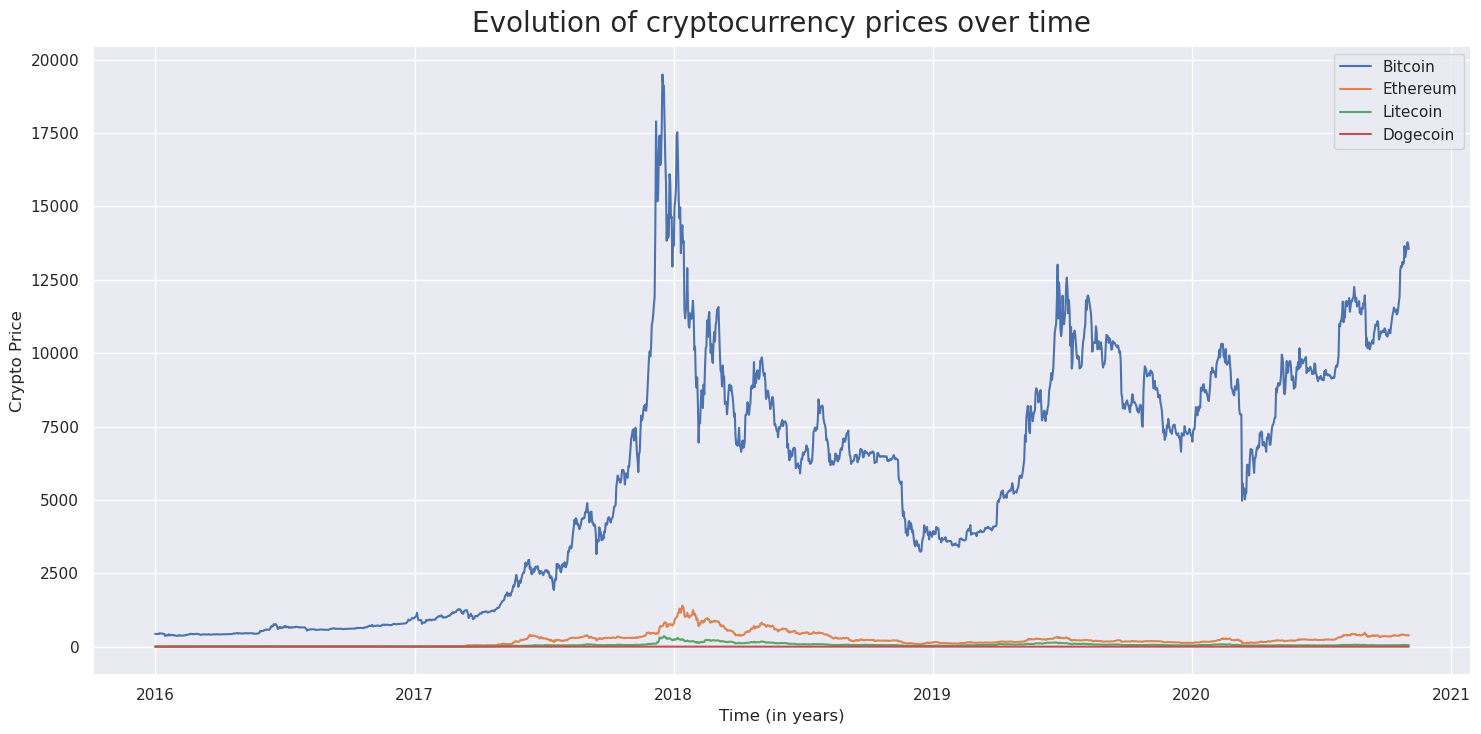

In [ ]:
# Line chart of crypto prices over time
coins_of_interest = ["Bitcoin", "Ethereum", "Litecoin", "Dogecoin"]
plt.figure(figsize = (15, 7.5))

df = data.loc[data["crypto_name"].isin(coins_of_interest)]
sns.lineplot(data = df, x = "trade_date", y = "price_usd", hue = "crypto_name")

plt.xlabel("Time (in years)")
plt.ylabel("Crypto Price")

plt.title("Evolution of cryptocurrency prices over time", fontsize = 20, pad = 10)

plt.legend()

plt.tight_layout()
plt.show()

From the visualization above, it is obvious that the price of Bitcoin has experienced more change over time. The prices of Ethereum, Litecoin, and Dogecoin, by contrast, have remained relatively stable over the years.

As part of __Quantum Investments__ decision-making process, it might be worth spending more time and resources focusing on Bitcoin, instead of Ethereum.

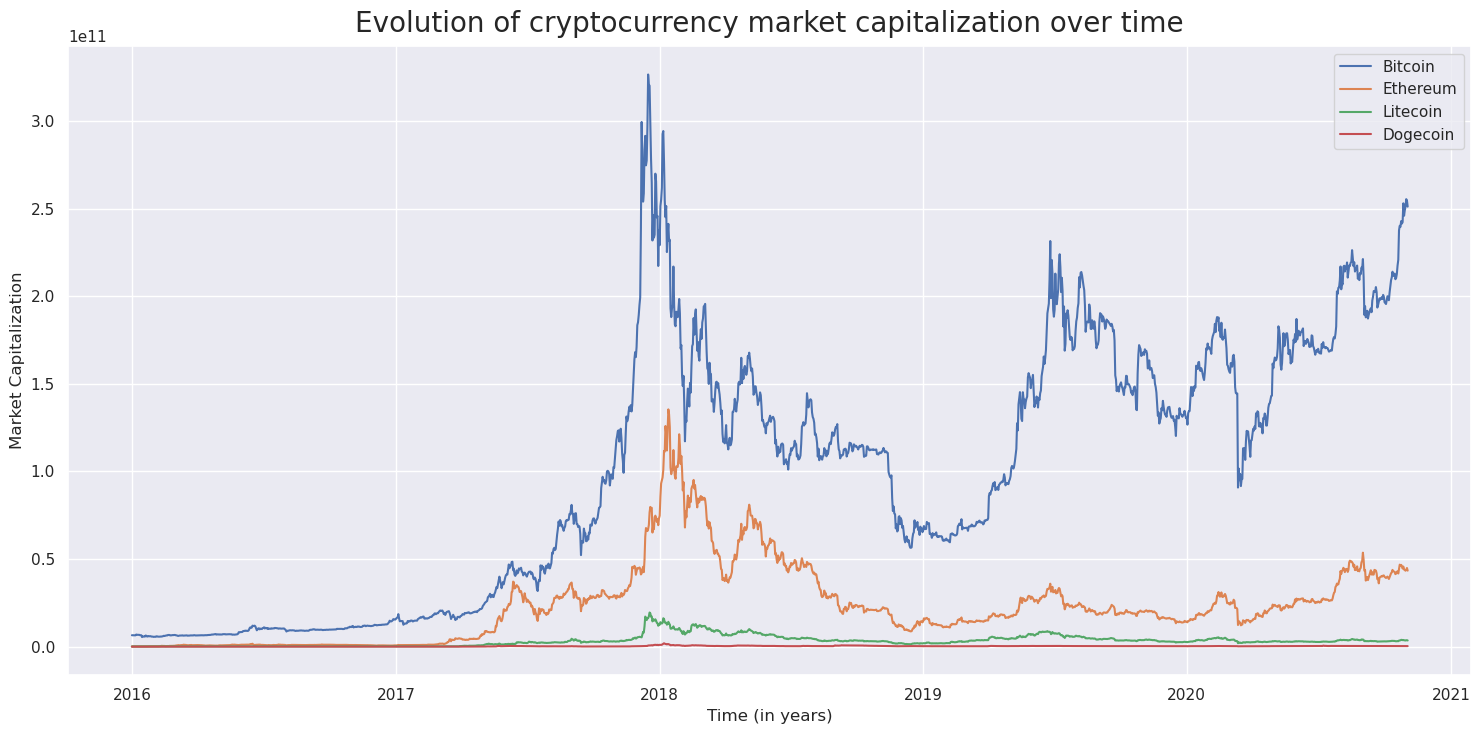

In [ ]:
# Line chart of crypto market cap over time
plt.figure(figsize = (15, 7.5))

df = data.loc[data["crypto_name"].isin(coins_of_interest)]
sns.lineplot(data = df, x = "trade_date", y = "market_cap", hue = "crypto_name")

plt.xlabel("Time (in years)")
plt.ylabel("Market Capitalization")

plt.title("Evolution of cryptocurrency market capitalization over time", fontsize = 20, pad = 10)

plt.legend()

plt.tight_layout()
plt.show()

The visual above shows us that both Bitcoin and Ethereum experience considerable change in their market capitalization over time. However, by the year 2021, the market capitalization of Ethereum has almost stabilized, while Bitcoin still exhibits an upward trend.

This implies that the Bitcoin market still has room for growth, while the Ethereum market is more stagnant, and may not be likely to expand so soon. The other coins show very little changes in terms of market capitalization. Also, taking the last two visualizations in tandem, it appears that the market capitalization of Ethereum changes even when the price remains mostly stagnant. This would seem to imply that most of the changes in market capitalization for Bitcoin is due to the change in prce, while that for Ethereum is mostly due to increase in the inherent value of the coin.

/tmp/ipykernel_777/4291260557.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["cap_per_price"] = df["market_cap"] / df["price_usd"] # Compute market cap per price


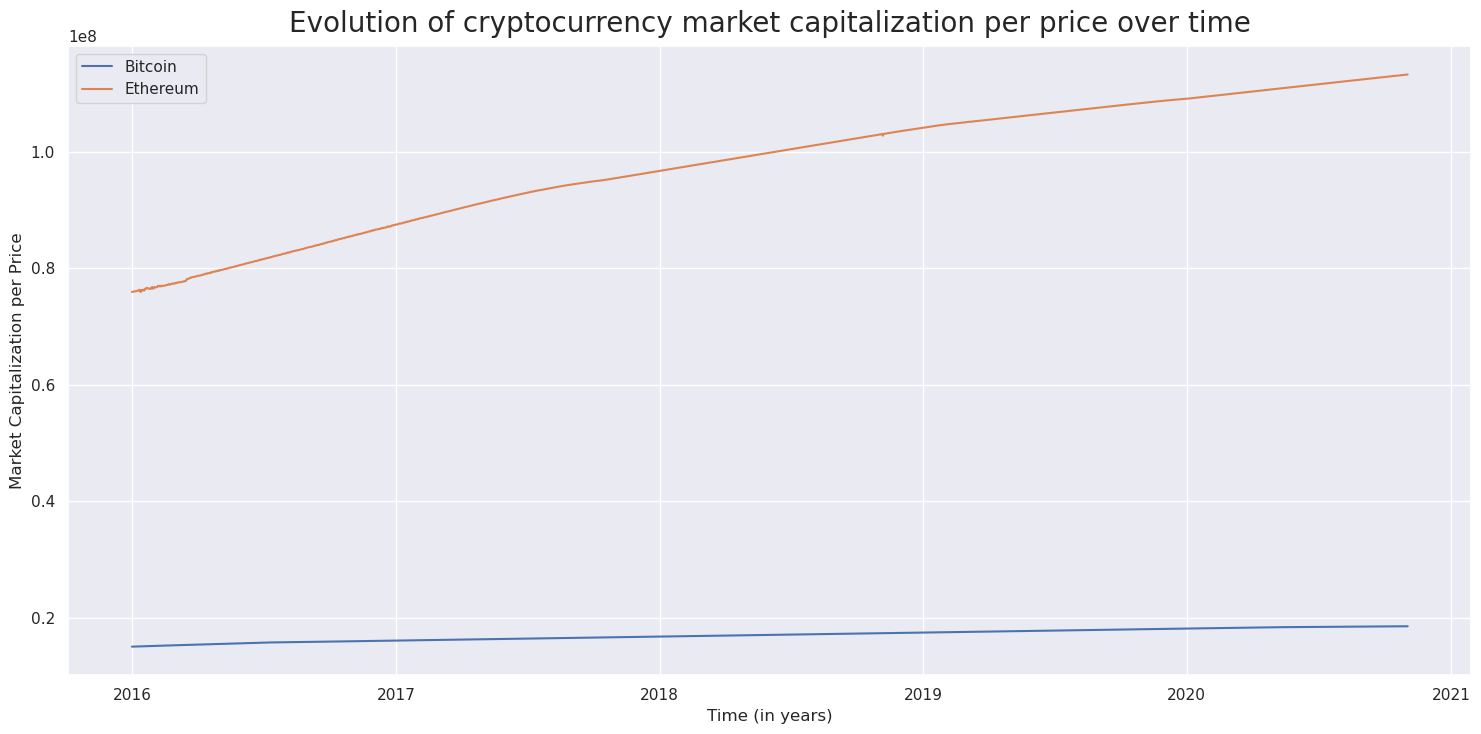

In [ ]:
# Line chart comparing Ethereum prices and market cap over time
plt.figure(figsize = (15, 7.5))

df = data.loc[data["crypto_name"].isin(["Ethereum", "Bitcoin"])]
df["cap_per_price"] = df["market_cap"] / df["price_usd"] # Compute market cap per price

sns.lineplot(data = df, x = "trade_date", y = "cap_per_price", hue = "crypto_name")

plt.xlabel("Time (in years)")
plt.ylabel("Market Capitalization per Price")

plt.title("Evolution of cryptocurrency market capitalization per price over time", fontsize = 20, pad = 10)

plt.legend()

plt.tight_layout()
plt.show()

/tmp/ipykernel_777/2808371716.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["cap_change_per_price_change"] = df["capitalization_change_1_day"] / df["USD_price_change_1_day"] # Compute market cap per price


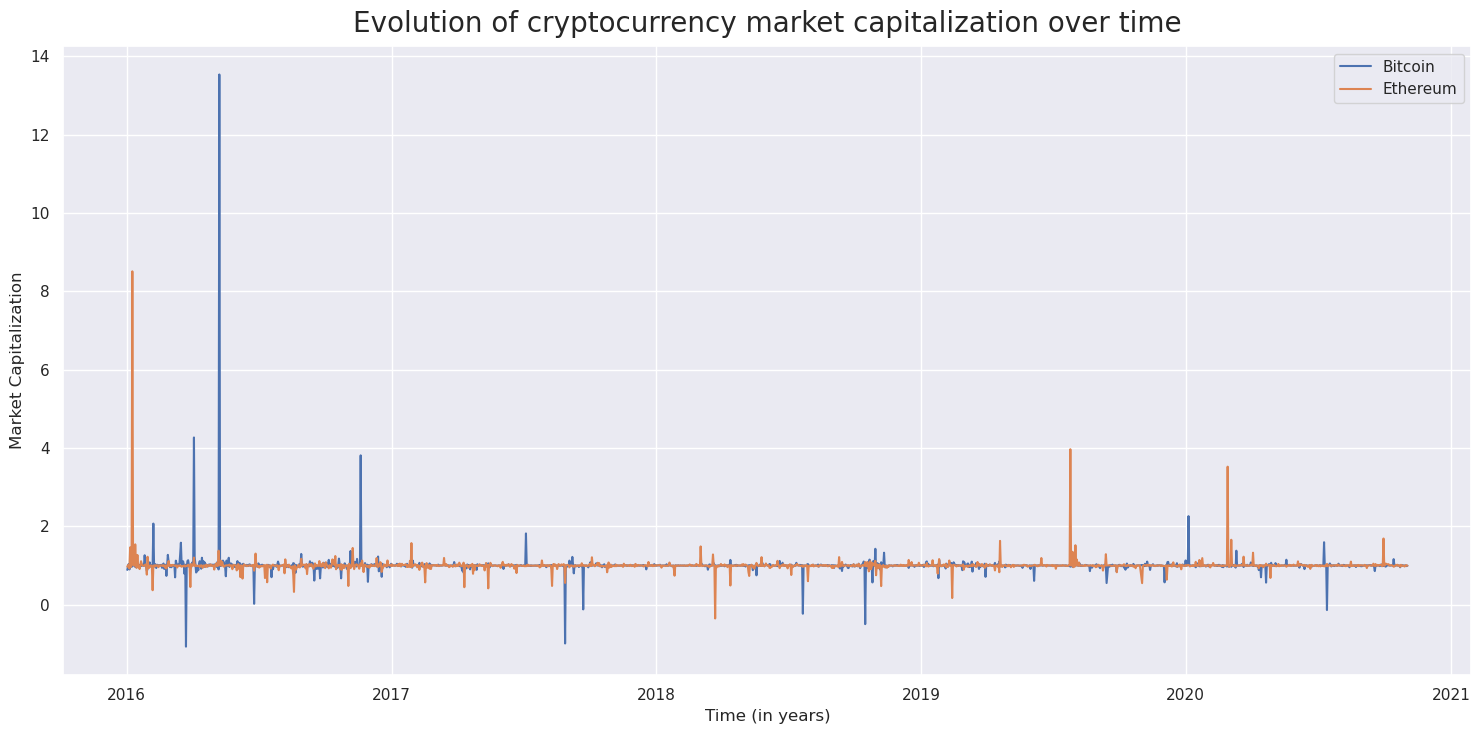

In [ ]:
# Line chart comparing Ethereum prices and market cap over time
plt.figure(figsize = (15, 7.5))

df = data.loc[data["crypto_name"].isin(["Ethereum", "Bitcoin"])]
df["cap_change_per_price_change"] = df["capitalization_change_1_day"] / df["USD_price_change_1_day"] # Compute market cap per price

sns.lineplot(data = df, x = "trade_date", y = "cap_change_per_price_change", hue = "crypto_name")

plt.xlabel("Time (in years)")
plt.ylabel("Market Capitalization")

plt.title("Evolution of cryptocurrency market capitalization over time", fontsize = 20, pad = 10)

plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
df.columns

Index(['trade_date', 'volume', 'price_usd', 'price_btc', 'market_cap',
       'capitalization_change_1_day', 'USD_price_change_1_day',
       'BTC_price_change_1_day', 'crypto_name', 'crypto_type', 'ticker',
       'max_supply', 'site_url', 'github_url', 'minable', 'platform_name',
       'industry_name', 'cap_change_per_price_change'],
      dtype='object')

##### Feature correlation

It would make some sense to observe the features for colinearity. As most of the features in the dataset are numerical, the __Pearson correlation coefficient__ will be utilized.

In [ ]:
correlation = data.select_dtypes(exclude=["object", "datetime"]).corr(method = "pearson")

In [ ]:
correlation

,volume,price_usd,price_btc,market_cap,capitalization_change_1_day,USD_price_change_1_day,BTC_price_change_1_day,crypto_type,max_supply,minable
volume,1.000000,-0.000171,-0.000170,-0.000018,-0.000024,-0.000158,-0.000159,-0.014143,-0.000168,0.021726
price_usd,-0.000171,1.000000,0.998659,-0.000009,-0.000003,-0.000019,-0.000019,0.004437,-0.000123,-0.003101
price_btc,-0.000170,0.998659,1.000000,-0.000009,-0.000003,-0.000019,-0.000020,0.004430,-0.000197,-0.003097
market_cap,-0.000018,-0.000009,-0.000009,1.000000,0.004697,0.000227,0.000252,0.001649,-0.000011,-0.001151
capitalization_change_1_day,-0.000024,-0.000003,-0.000003,0.004697,1.000000,0.050131,0.050497,0.000607,-0.000006,-0.000427
USD_price_change_1_day,-0.000158,-0.000019,-0.000019,0.000227,0.050131,1.000000,0.999836,-0.001393,-0.000011,0.001616
BTC_price_change_1_day,-0.000159,-0.000019,-0.000020,0.000252,0.050497,0.999836,1.000000,-0.001410,-0.000011,0.001629
crypto_type,-0.014143,0.004437,0.004430,0.001649,0.000607,-0.001393,-0.001410,1.000000,0.004305,-0.688622
max_supply,-0.000168,-0.000123,-0.000197,-0.000011,-0.000006,-0.000011,-0.000011,0.004305,1.000000,-0.003097
minable,0.021726,-0.003101,-0.003097,-0.001151,-0.000427,0.001616,0.001629,-0.688622,-0.003097,1.000000


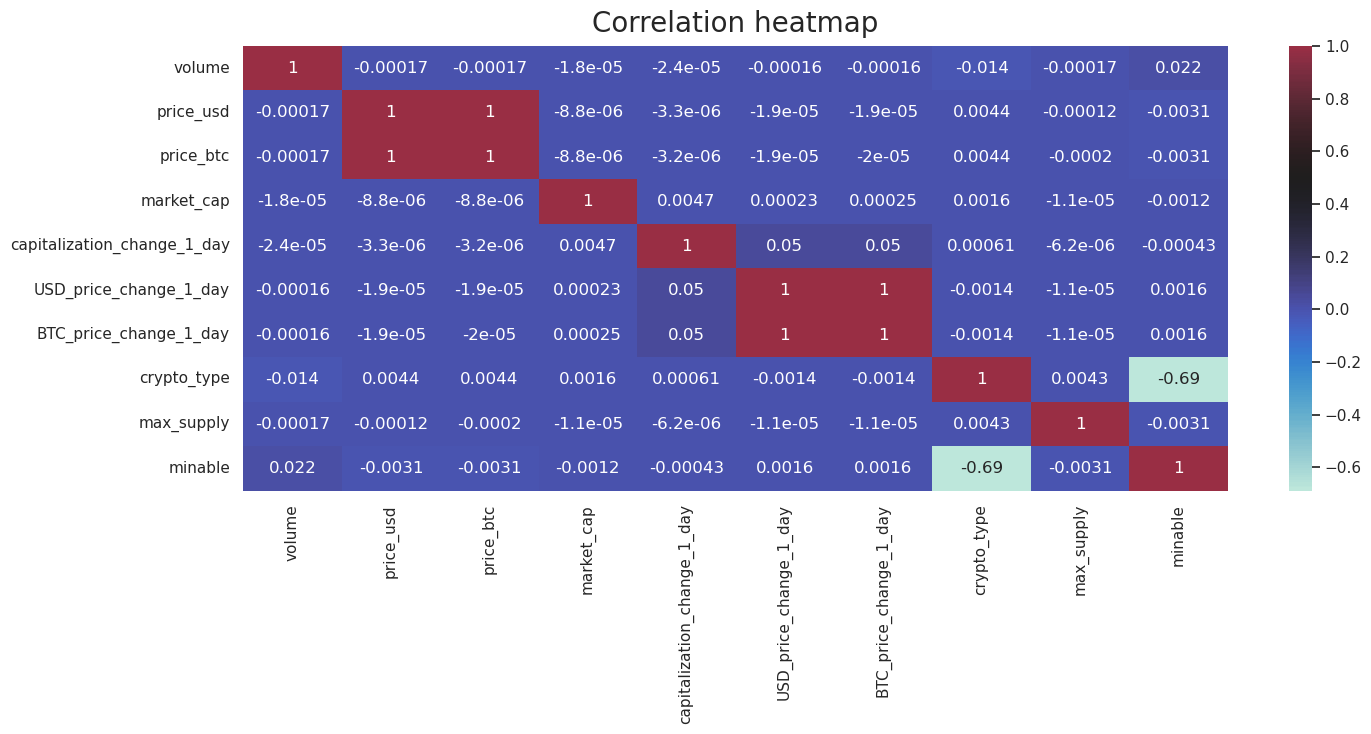

In [ ]:
# Correlation heat map

plt.figure(figsize = (15, 7.5))

sns.heatmap(correlation, center=.5, annot = True)

plt.title("Correlation heatmap", fontsize = 20, pad = 10)

plt.tight_layout()
plt.show()

From the visual heatmap above, there is no multicollinearity in the dataset.

From the correlation analysis above, the only tangible level of correlation is observed with the _crypto_tye_ and _minable_ columns. This makes some sense, as the type of cryptocurrency of interest will affect whether or not it is minable. Beyond that, it is obvious that most of the features exhibit low correlations with one another and with the target variable itself. This may be taken as a mix of good and bad news.

The good news is that there is little colinearity among the features. This is good for feature independence, which might imply that each variable encodes information that might be relatively orthogonal to the information encoded within other variables. The bad news is, that any model trained in these features might have a difficult time learning anything from the data, as the target variable has little correlation with the independent variables.


#### 2.2. Data Implications

Implied by our findings above, we can say the following:

1. ___Missing values and outliers___: There are a lot of missing values in the dataset. This may be fixed either by value imputation of missingness encoding. As regards outliers, there are quite a lot also. These can be filtered out.

2. ___Data duplication___: There are very few duplicated values out of more than 2 million records.

3. ___Low cardinality or feature invariance___: There are no invariant features. This means all the features in the dataset might be useful in some way. Also, most features

4. ___Correlation___: For the most part, the features exhibit very little collinearity, hence ensuring feature independence. However, the target variable exhibits a low correlation with the independent variables.


---

<div><h3>03. Data Preparation</h3></div>

Based on the *__Data Implications__* discovered prior, the following steps will be experimented upon for the data preparation stage.

1. __Missing Values__: The missing values will be treated via an algorithmic method, ___SimpleImputer___ where needed.

2. __Feature Encoding__: Depending on the final model used, the categorical features such as _platform_name_, _industry_name_, etcetera may need to be encoded.

3. __Filter Data__: For accurate and focused forecasting, the subset of data to be modelled will be __Bitcoin__ data. This is in accordance with the recommendation that the more potentially beneficial cryptocurrencies be focused upon by __Quatum Investments__.

4. __Unnecessary Features__: Depending on the model being used, some of the features are not required. These extra features will be eliminated.


<div align="center"><h3>3.1. Enter Data Preparation Code Here</h3></div>


In [ ]:
# Select Bitcoin data
df = data.loc[data["crypto_name"] == "Bitcoin", ["trade_date", "price_usd"]]

In [ ]:
df.set_index("trade_date", inplace=True)
df.index = pd.DatetimeIndex(df.index).to_period('D')

In [ ]:
df.head()

,price_usd
trade_date,
2016-01-01,434.33
2016-01-02,433.44
2016-01-03,430.01
2016-01-04,433.09
2016-01-05,431.96


In [ ]:
# df = df.resample("D").mean()

In [ ]:
df.head()

,price_usd
trade_date,
2016-01-01,434.33
2016-01-02,433.44
2016-01-03,430.01
2016-01-04,433.09
2016-01-05,431.96


In [ ]:
df.isnull().sum()

price_usd    0
dtype: int64

In [ ]:
df.nunique()

price_usd    1740
dtype: int64

In [ ]:
df.shape

(1746, 1)

---

<div><h3>04. Data Modelling</h3></div>

In [ ]:
# from sklearn.model_selection import train_test_split

# from sklearn.impute import SimpleImputer
# from sklearn.pipeline import Pipeline

# from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, PowerTransformer
# from sklearn.compose import ColumnTransformer, TransformedTargetRegressor

# from sklearn.svm import SVR
# from sklearn.linear_model import LinearRegression
# from sklearn.ensemble import AdaBoostRegressor, ExtraTreesRegressor

# from catboost import CatBoostRegressor

# from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import mean_absolute_error, mean_squared_error
import statsmodels.api as sm

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.statespace.exponential_smoothing import ExponentialSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HoltExponentialSmoothing

With the data well-prepared now, the modeling can begin. A number of learning algorithms will be tested. They are:

1. ___SARIMAX___,
2. ___Exponential Smoothing___, and
3. ___ARIMA___

#### 4.1. Modelling

In [ ]:
def obtain_best(aic_values, bic_values, pq_values):
    best_aic = min(aic_values)
    best_bic = min(bic_values)

    best_ix = aic_values.index(min(aic_values))
    best_params = pq_values[best_ix]

    for i in range(len(aic_values)):
        print(f"AIC = {aic_values[i]},     BIC = {bic_values[i]},        (p, q) = {pq_values[i]}")

    return best_aic, best_bic, best_params

In [ ]:
def optimize_exp_model(model, **kwargs):
    # Test and optimize ARIMA model
    trends = kwargs["trend"]
    damped_trends = kwargs["damped_trend"]
    seasonals = kwargs["seasonal"]
    seasonal_periods = kwargs["seasonal_periods"]
    use_boxcox = kwargs["use_boxcox"]

    aic_values = []
    bic_values = []
    pq_values = []

    for trend in trends:
        for damped_trend in damped_trends:
            for seasonal in seasonals:
                for seasonal_period in seasonal_periods:
                    for use in use_boxcox:
                        try:
                            try: #Holt-Winters
                                exp_model = model(
                                    endog = df, trend = trend, damped_trend = damped_trend,
                                    seasonal = seasonal, seasonal_periods = seasonal_period, use_boxcox = use
                                )

                            except: # Exponential
                                exp_model = model(
                                    endog = df, trend = trend, damped_trend = damped_trend,
                                    seasonal = seasonal_period,
                                )
                            try:
                                results = exp_model.fit(maxiter = kwargs["max_iter"])
                            except:
                                results = exp_model.fit()

                            r = get_metrics(results = results)

                            aic_values.append(r["AIC"])
                            bic_values.append(r["BIC"])
                            params = {
                                "trend": trend,
                                "damped_trend": damped_trend,
                                "seasonal": seasonal,
                                "seasonal_periods": seasonal_period,
                                "use_boxcox": use
                            }
                            pq_values.append(params)
                        except:
                            exp_model = None
                            pass

    seasonal_order = None

    best_aic, best_bic, best_parameters = obtain_best(aic_values, bic_values, pq_values)

    return best_aic, best_bic, best_parameters, seasonal_order

In [ ]:
def optimize_arima_model(model, **kwargs):
    # Test and optimize ARIMA model
    p_range = q_range = list(range(kwargs["lower"], kwargs["upper"]))  # taking values from 0 to 5
    d = kwargs["d"]

    aic_values = []
    bic_values = []
    pq_values = []

    for p in p_range:
        for q in q_range:
            try:
                arima_model = model(endog = df, order = (p, d, q), )
                try:
                    seasonal_order = (p, d, q, kwargs["s"])
                    arima_model.seasonal_order = seasonal_order
                    results = arima_model.fit(max_iter = kwargs["max_iter"])
                except:
                    results = arima_model.fit()

                r = get_metrics(results = results)

                aic_values.append(r["AIC"])
                bic_values.append(r["BIC"])
                pq_values.append((p, q))
            except:
                arima_model = None
                seasonal_order = None
                pass

    best_aic, best_bic, best_parameters = obtain_best(aic_values, bic_values, pq_values)

    return best_aic, best_bic, best_parameters, seasonal_order

In [ ]:
def optimize_model(model, **kwargs):
    try:
        return optimize_arima_model(model, **kwargs)
    except:
        return optimize_exp_model(model, **kwargs)

In [ ]:
def get_metrics(results):
    results_ = results.summary().__str__().split("\n")
    aic = results_[4].split("AIC")[-1].strip()
    bic = results_[5].split("BIC")[-1].strip()

    return {"AIC": float(aic) if "." in aic else int(aic), "BIC": float(bic) if "." in bic else int(bic)}

In [ ]:
# Set model keywords
arima_kwargs = {
    "lower": 0,
    "upper": 10,
    "d": 0,
    "s": 4,
    "max_iter": 500
}

#### SARIMAX model

In [ ]:
# Get optimal parameters for SARIMAX model
sarimax_aic_, sarimax_bic_, sarimax_params, seasonal_order = optimize_model(SARIMAX, **arima_kwargs)

/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: max_iter. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, app

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.02640D+01    |proj g|=  1.77636D-10

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   1.776D-10   1.026D+01
  F =   10.263950035142893     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.0

/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: max_iter. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.



At iterate   15    f=  9.81006D+00    |proj g|=  2.07691D-03

At iterate   20    f=  9.80320D+00    |proj g|=  6.66106D-03

At iterate   25    f=  9.56521D+00    |proj g|=  1.64011D+01

At iterate   30    f=  9.51887D+00    |proj g|=  2.56109D-01

At iterate   35    f=  9.51882D+00    |proj g|=  1.64444D-03

At iterate   40    f=  9.51877D+00    |proj g|=  9.14632D-02

At iterate   45    f=  9.06851D+00    |proj g|=  3.06909D-02

At iterate   50    f=  9.06302D+00    |proj g|=  1.22630D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     50     96      1     0     0   1.226D-04   9.063D+00
  F =   9.06301558802

/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: max_iter. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.02640D+01    |proj g|=  9.97672D-01

At iterate    5    f=  9.78620D+00    |proj g|=  1.53915D-03

At iterate   10    f=  9.78605D+00    |proj g|=  2.27159D-04

At iterate   15    f=  9.78350D+00    |proj g|=  4.30923D-03

At iterate   20    f=  9.75312D+00    |proj g|=  1.38622D-02

At iterate   25    f=  9.50834D+00    |proj g|=  5.02008D-01

At iterate   30    f=  9.19201D+00    |proj g|=  3.69190D-03

At iterate   35    f=  9.19094D+00    |proj g|=  4.94608D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: max_iter. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.80669D+00    |proj g|=  3.32051D-02

At iterate    5    f=  9.79951D+00    |proj g|=  1.41010D-02

At iterate   10    f=  9.79871D+00    |proj g|=  2.97283D-02

At iterate   15    f=  9.79456D+00    |proj g|=  4.60629D-02

At iterate   20    f=  9.78132D+00    |proj g|=  9.89419D-03

At iterate   25    f=  9.77880D+00    |proj g|=  2.56522D-03

At iterate   30    f=  9.77736D+00    |proj g|=  1.40743D-04

At iterate   35    f=  9.77628D+00    |proj g|=  6.58767D-03

At iterate   40    f=  9.76716D+00    |proj g|=  3.15222D-02

At iterate   45    f=  9.64306D+00    |proj g|=  2.80403D+00


/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: max_iter. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.



At iterate   50    f=  9.25254D+00    |proj g|=  9.17970D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     50     96      1     0     0   9.180D-01   9.253D+00
  F =   9.2525352373308731     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.02640D+01    |proj g|=  9.97360D-01

At iterate    5    f=  9.77358D+00    |proj g|=  5.76091D-04

At iterate   10    f=  9.77352D+00    |proj g|=  2.72075D-04

At iter

/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: max_iter. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.



At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.02640D+01    |proj g|=  9.97348D-01

At iterate    5    f=  9.77164D+00    |proj g|=  1.22871D-03

At iterate   10    f=  9.77154D+00    |proj g|=  1.42435D-04

At iterate   15    f=  9.77054D+00    |proj g|=  2.49004D-03

At iterate   20    f=  9.74756D+00    |proj g|=  3.56976D-02
  ys=-4.865E-03  -gs= 8.724E-03 BFGS update SKIPPED
  ys=-2.104E+00  -gs= 1.260E-01 BFGS update SKIPPED

At iterate   25    f=  9.70424D+00    |proj g|=  1.66201D+00

At iterate   30    f=  9.59851D+00    |proj g|=  1.55079D-01

At iterate   35    f=  9.26404D+00    |proj g|=  5.14520D+00

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

   

/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: max_iter. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.



At iterate    5    f=  9.77078D+00    |proj g|=  7.48287D-04

At iterate   10    f=  9.77065D+00    |proj g|=  1.83008D-04

At iterate   15    f=  9.76937D+00    |proj g|=  2.40550D-03

At iterate   20    f=  9.75397D+00    |proj g|=  1.00226D-01

At iterate   25    f=  9.74294D+00    |proj g|=  6.10081D-01
  ys=-1.360E-01  -gs= 1.087E-01 BFGS update SKIPPED

At iterate   30    f=  9.69325D+00    |proj g|=  5.68810D-01

At iterate   35    f=  9.65325D+00    |proj g|=  1.06005D+00

At iterate   40    f=  9.64366D+00    |proj g|=  1.06665D+00

At iterate   45    f=  9.61675D+00    |proj g|=  1.74006D+00


/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: max_iter. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.



At iterate   50    f=  9.42776D+00    |proj g|=  1.43233D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     87      1     1     0   1.432D+01   9.428D+00
  F =   9.4277565192942010     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.02640D+01    |proj g|=  9.96679D-01

At iterate    5    f=  9.77001D+00    |proj g|=  6.49115D-04

At iterate   10    f=  9.76987D+00    |proj g|=  2.28359D-04

At iter

/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: max_iter. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.



At iterate   50    f=  8.62894D+00    |proj g|=  2.77988D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     95      1     1     0   2.780D-02   8.629D+00
  F =   8.6289411408299443     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.02640D+01    |proj g|=  9.96552D-01

At iterate    5    f=  9.76954D+00    |proj g|=  3.24758D-04

At iterate   10    f=  9.76947D+00    |proj g|=  2.53860D-04

At iter

/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: max_iter. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.



At iterate   50    f=  8.59415D+00    |proj g|=  5.78956D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50    104      1     1     0   5.790D-01   8.594D+00
  F =   8.5941537627281281     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.39101D+02    |proj g|=  4.63811D+02

At iterate    5    f=  9.79208D+00    |proj g|=  4.40722D+00

At iterate   10    f=  7.38736D+00    |proj g|=  1.81961D-01

At iter

/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: max_iter. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: max_iter. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.
/home/harkhymadhe/mambaforge/lib/python3.10/site-p


           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5      3      5      1     0     0   2.604D-05   7.196D+00
  F =   7.1959047155198190     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.47657D+02    |proj g|=  4.95773D+02

At iterate    5    f=  8.55323D+00    |proj g|=  1.31780D+00


/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: max_iter. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.



At iterate   10    f=  7.34259D+00    |proj g|=  1.46874D-01

At iterate   15    f=  7.21105D+00    |proj g|=  3.68846D-02

At iterate   20    f=  7.19559D+00    |proj g|=  5.45253D-03

At iterate   25    f=  7.19392D+00    |proj g|=  6.02557D-03

At iterate   30    f=  7.19385D+00    |proj g|=  1.43103D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     32     35      1     0     0   3.428D-05   7.194D+00
  F =   7.1938501813795019     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: max_iter. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: max_iter. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.19060D+00    |proj g|=  1.31927D-02

At iterate    5    f=  7.19044D+00    |proj g|=  4.50909D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8      5      7      1     0     0   4.509D-05   7.190D+00
  F =   7.1904416458046345     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: max_iter. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.36631D+02    |proj g|=  4.69780D+02

At iterate    5    f=  8.09915D+00    |proj g|=  5.41381D-01

At iterate   10    f=  7.31665D+00    |proj g|=  1.60562D-01

At iterate   15    f=  7.20676D+00    |proj g|=  6.35296D-02

At iterate   20    f=  7.19080D+00    |proj g|=  1.36993D-02

At iterate   25    f=  7.18925D+00    |proj g|=  1.53181D-03

At iterate   30    f=  7.18917D+00    |proj g|=  1.32949D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: max_iter. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.19044D+00    |proj g|=  1.39819D-02

At iterate    5    f=  7.19026D+00    |proj g|=  6.06010D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10      5      7      1     0     0   6.060D-05   7.190D+00
  F =   7.1902590433231479     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: max_iter. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.18906D+00    |proj g|=  1.26968D-02

At iterate    5    f=  7.18889D+00    |proj g|=  7.06915D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11      5      8      1     0     0   7.069D-05   7.189D+00
  F =   7.1888861602005827     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 v

/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: max_iter. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: max_iter. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.



At iterate    5    f=  7.19541D+00    |proj g|=  7.03728D-03

At iterate   10    f=  7.19529D+00    |proj g|=  1.14201D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     19      1     0     0   1.141D-05   7.195D+00
  F =   7.1952894946930233     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.38425D+02    |proj g|=  4.62459D+02

At iterate    5    f=  7.77191D+00    |proj g|=  1.02487D+00


/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: max_iter. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.



At iterate   10    f=  7.21867D+00    |proj g|=  3.79807D-02

At iterate   15    f=  7.19520D+00    |proj g|=  7.42290D-03

At iterate   20    f=  7.19418D+00    |proj g|=  1.69704D-03

At iterate   25    f=  7.19418D+00    |proj g|=  9.33297D-04

At iterate   30    f=  7.19385D+00    |proj g|=  3.80655D-03

At iterate   35    f=  7.19381D+00    |proj g|=  8.39302D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     35     43      1     0     0   8.393D-06   7.194D+00
  F =   7.1938085389202282     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machin

/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: max_iter. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.



At iterate   10    f=  7.20635D+00    |proj g|=  3.58314D-02

At iterate   15    f=  7.19449D+00    |proj g|=  3.05661D-03

At iterate   20    f=  7.19418D+00    |proj g|=  3.95085D-04

At iterate   25    f=  7.19418D+00    |proj g|=  6.92368D-04

At iterate   30    f=  7.19408D+00    |proj g|=  3.13999D-03

At iterate   35    f=  7.19381D+00    |proj g|=  3.15397D-03

At iterate   40    f=  7.19360D+00    |proj g|=  1.78974D-03

At iterate   45    f=  7.19359D+00    |proj g|=  1.39055D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     45     52      1     0     0   1.391D-05   7.194D+00
  F =   7.19359080453

/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: max_iter. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.



At iterate   10    f=  7.20725D+00    |proj g|=  3.49950D-02

At iterate   15    f=  7.19449D+00    |proj g|=  2.95337D-03

At iterate   20    f=  7.19406D+00    |proj g|=  3.27781D-04

At iterate   25    f=  7.19405D+00    |proj g|=  1.98464D-03

At iterate   30    f=  7.19385D+00    |proj g|=  1.50514D-02

At iterate   35    f=  7.19224D+00    |proj g|=  1.54792D-02

At iterate   40    f=  7.19178D+00    |proj g|=  4.76995D-04

At iterate   45    f=  7.19178D+00    |proj g|=  1.69922D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     45     53      1     0     0   1.699D-05   7.192D+00
  F =   7.19177917588

/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: max_iter. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.



At iterate   10    f=  7.19059D+00    |proj g|=  4.47666D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     14     16      1     0     0   3.617D-05   7.191D+00
  F =   7.1905550744371940     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.19043D+00    |proj g|=  1.47042D-02


/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: max_iter. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.



At iterate    5    f=  7.19019D+00    |proj g|=  2.57468D-04

At iterate   10    f=  7.19018D+00    |proj g|=  1.18617D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     13     16      1     0     0   4.070D-05   7.190D+00
  F =   7.1901776845172325     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: max_iter. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.58697D+02    |proj g|=  1.09871D+03

At iterate    5    f=  7.69147D+00    |proj g|=  4.65377D-01

At iterate   10    f=  7.21717D+00    |proj g|=  4.09485D-02

At iterate   15    f=  7.19106D+00    |proj g|=  1.27699D-02

At iterate   20    f=  7.18966D+00    |proj g|=  5.49985D-03

At iterate   25    f=  7.18955D+00    |proj g|=  5.57076D-04

At iterate   30    f=  7.18955D+00    |proj g|=  1.01386D-04

At iterate   35    f=  7.18953D+00    |proj g|=  3.45610D-03

At iterate   40    f=  7.18898D+00    |proj g|=  9.80323D-03

At iterate   45    f=  7.18880D+00    |proj g|=  1.15884D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: max_iter. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.



At iterate    5    f=  7.18904D+00    |proj g|=  4.65156D-03

At iterate   10    f=  7.18804D+00    |proj g|=  4.98470D-03

At iterate   15    f=  7.18799D+00    |proj g|=  6.11880D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     17     19      1     0     0   6.118D-05   7.188D+00
  F =   7.1879858939748944     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.18860D+00    |proj g|=  1.56308D-02


/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: max_iter. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.



At iterate    5    f=  7.18802D+00    |proj g|=  1.04642D-02

At iterate   10    f=  7.18655D+00    |proj g|=  1.30194D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     14     16      1     0     0   8.234D-05   7.187D+00
  F =   7.1865471172974758     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.19613D+00    |proj g|=  2.44839D-05

           * * *

Tit   = total number of iterations
Tnf   = total nu

/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: max_iter. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: max_iter. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.
/home/harkhymadhe/mambaforge/lib/python3.10/site-p

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.38449D+02    |proj g|=  4.62506D+02

At iterate    5    f=  7.44912D+00    |proj g|=  6.15709D-01

At iterate   10    f=  7.20231D+00    |proj g|=  2.64020D-02

At iterate   15    f=  7.19158D+00    |proj g|=  2.03687D-02

At iterate   20    f=  7.18912D+00    |proj g|=  3.02254D-03

At iterate   25    f=  7.18885D+00    |proj g|=  4.82547D-04

At iterate   30    f=  7.18882D+00    |proj g|=  2.50086D-03

At iterate   35    f=  7.18864D+00    |proj g|=  2.89320D-03

At iterate   40    f=  7.18860D+00    |proj g|=  1.91218D-04

At iterate   45    f=  7.18860D+00    |proj g|=  1.05844D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = nu

/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: max_iter. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.



At iterate   10    f=  7.19319D+00    |proj g|=  1.93803D-02

At iterate   15    f=  7.18878D+00    |proj g|=  3.06677D-03

At iterate   20    f=  7.18826D+00    |proj g|=  1.48203D-03

At iterate   25    f=  7.18821D+00    |proj g|=  7.54040D-04

At iterate   30    f=  7.18817D+00    |proj g|=  6.40156D-03

At iterate   35    f=  7.18801D+00    |proj g|=  6.61690D-04

At iterate   40    f=  7.18800D+00    |proj g|=  5.12138D-04

At iterate   45    f=  7.18800D+00    |proj g|=  3.63653D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     48     57      1     0     0   3.650D-05   7.188D+00
  F =   7.18799874447

/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: max_iter. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.



At iterate   10    f=  7.19691D+00    |proj g|=  3.51687D-02

At iterate   15    f=  7.18893D+00    |proj g|=  2.52609D-03

At iterate   20    f=  7.18860D+00    |proj g|=  2.99517D-03

At iterate   25    f=  7.18820D+00    |proj g|=  1.38605D-03

At iterate   30    f=  7.18818D+00    |proj g|=  1.96899D-04

At iterate   35    f=  7.18815D+00    |proj g|=  4.19870D-03

At iterate   40    f=  7.18802D+00    |proj g|=  4.35480D-03

At iterate   45    f=  7.18800D+00    |proj g|=  2.19321D-04

At iterate   50    f=  7.18800D+00    |proj g|=  9.20763D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     57   

/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: max_iter. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.19164D+00    |proj g|=  2.05744D-02

At iterate    5    f=  7.19116D+00    |proj g|=  9.64990D-03

At iterate   10    f=  7.19046D+00    |proj g|=  2.00490D-03

At iterate   15    f=  7.19042D+00    |proj g|=  4.70370D-03

At iterate   20    f=  7.19033D+00    |proj g|=  3.82521D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     23     27      1     0     0   3.729D-05   7.190D+00
  F =   7.1903273915655141     

CONVERG

/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: max_iter. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.



At iterate    5    f=  7.18945D+00    |proj g|=  1.17051D-02

At iterate   10    f=  7.18786D+00    |proj g|=  3.90857D-03

At iterate   15    f=  7.18743D+00    |proj g|=  1.94331D-02

At iterate   20    f=  7.18675D+00    |proj g|=  1.35032D-03

At iterate   25    f=  7.18673D+00    |proj g|=  6.37482D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     26     31      1     0     0   6.373D-05   7.187D+00
  F =   7.1867304273812955     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: max_iter. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.



At iterate    5    f=  7.40377D+00    |proj g|=  2.16197D-01

At iterate   10    f=  7.20116D+00    |proj g|=  4.16165D-02

At iterate   15    f=  7.18941D+00    |proj g|=  1.46288D-02

At iterate   20    f=  7.18702D+00    |proj g|=  4.78179D-03

At iterate   25    f=  7.18653D+00    |proj g|=  8.73839D-04

At iterate   30    f=  7.18652D+00    |proj g|=  1.12224D-03

At iterate   35    f=  7.18643D+00    |proj g|=  8.07022D-03

At iterate   40    f=  7.18635D+00    |proj g|=  3.48201D-04

At iterate   45    f=  7.18633D+00    |proj g|=  1.05330D-03


/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: max_iter. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.



At iterate   50    f=  7.18628D+00    |proj g|=  1.74036D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     56      1     0     0   1.740D-03   7.186D+00
  F =   7.1862812989456524     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.18928D+00    |proj g|=  1.49618D-02

At iterate    5    f=  7.18883D+00    |proj g|=  5.16776D-03

At iterate   10    f=  7.18507D+00    |proj g|=  1.59755D-02

At iter

/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: max_iter. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.18857D+00    |proj g|=  1.98471D-02

At iterate    5    f=  7.18823D+00    |proj g|=  3.31059D-03

At iterate   10    f=  7.18770D+00    |proj g|=  1.14679D-03

At iterate   15    f=  7.18752D+00    |proj g|=  1.20624D-02

At iterate   20    f=  7.18527D+00    |proj g|=  1.47214D-02

At iterate   25    f=  7.18348D+00    |proj g|=  2.12013D-02

At iterate   30    f=  7.18193D+00    |proj g|=  6.32516D-03

At iterate   35    f=  7.18158D+00    |proj g|=  5.71582D-04

At iterate   40    f=  7.18158D+00    |proj g|=  4.72975D-04

At iterate   45    f=  7.18158D+00    |proj g|=  1.18737D-04

At iterate   50    f=  7.18146D+00    |proj g|=  8.58872D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: max_iter. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.38796D+02    |proj g|=  4.63200D+02

At iterate    5    f=  8.75136D+00    |proj g|=  1.01824D+00

At iterate   10    f=  7.38469D+00    |proj g|=  9.06131D-02

At iterate   15    f=  7.35229D+00    |proj g|=  7.62352D-03

At iterate   20    f=  7.28182D+00    |proj g|=  2.79949D-01

At iterate   25    f=  7.19653D+00    |proj g|=  3.63472D-02

At iterate   30    f=  7.19525D+00    |proj g|=  6.40477D-03

At iterate   35    f=  7.19471D+00    |proj g|=  1.02795D-03

At iterate   40    f=  7.19470D+00    |proj g|=  4.76824D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg 

/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: max_iter. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.



At iterate   10    f=  7.21335D+00    |proj g|=  4.33339D-02

At iterate   15    f=  7.19511D+00    |proj g|=  2.36354D-02

At iterate   20    f=  7.19420D+00    |proj g|=  1.75489D-03

At iterate   25    f=  7.19418D+00    |proj g|=  1.45230D-04

At iterate   30    f=  7.19392D+00    |proj g|=  9.00608D-03

At iterate   35    f=  7.19353D+00    |proj g|=  1.93632D-03

At iterate   40    f=  7.19352D+00    |proj g|=  2.84079D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     41     52      1     0     0   2.413D-05   7.194D+00
  F =   7.1935152066881827     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: max_iter. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.



At iterate    5    f=  7.49320D+00    |proj g|=  4.31872D-01

At iterate   10    f=  7.20334D+00    |proj g|=  4.67460D-02

At iterate   15    f=  7.18943D+00    |proj g|=  1.10797D-02

At iterate   20    f=  7.18864D+00    |proj g|=  7.48251D-03

At iterate   25    f=  7.18815D+00    |proj g|=  2.38178D-03

At iterate   30    f=  7.18814D+00    |proj g|=  3.97038D-04

At iterate   35    f=  7.18810D+00    |proj g|=  4.98763D-03

At iterate   40    f=  7.18799D+00    |proj g|=  1.35297D-03

At iterate   45    f=  7.18798D+00    |proj g|=  2.25375D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     46     55   

/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: max_iter. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.



At iterate   10    f=  7.19170D+00    |proj g|=  1.11151D-02

At iterate   15    f=  7.19112D+00    |proj g|=  3.34736D-03

At iterate   20    f=  7.19079D+00    |proj g|=  2.95519D-03

At iterate   25    f=  7.19073D+00    |proj g|=  1.35489D-03

At iterate   30    f=  7.19060D+00    |proj g|=  3.59586D-03

At iterate   35    f=  7.19059D+00    |proj g|=  9.97109D-05

At iterate   40    f=  7.19059D+00    |proj g|=  4.84997D-04

At iterate   45    f=  7.19058D+00    |proj g|=  1.20808D-03


/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgt


At iterate   50    f=  7.18996D+00    |proj g|=  6.41952D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     73      1     0     0   6.420D-02   7.190D+00
  F =   7.1899582353799794     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.41592D+02    |proj g|=  4.68793D+02

At iterate    5    f=  7.29538D+00    |proj g|=  1.79237D-01

At iterate   10    f=  7.19889D+00    |proj g|=  4.19119D-02

At iter

/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: max_iter. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.



At iterate   50    f=  7.19048D+00    |proj g|=  3.11595D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     50     56      1     0     0   3.116D-04   7.190D+00
  F =   7.1904752538487564     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.18957D+00    |proj g|=  5.90382D-02

At iterate    5    f=  7.18780D+00    |proj g|=  9.38436D-03

At iterate   10    f=  7.18761D+00    |proj g|=  5.59305D-03

At iter

/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: max_iter. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.



At iterate    5    f=  7.29032D+00    |proj g|=  2.20562D-01

At iterate   10    f=  7.20090D+00    |proj g|=  3.55810D-02

At iterate   15    f=  7.19122D+00    |proj g|=  1.45393D-02

At iterate   20    f=  7.19002D+00    |proj g|=  3.16515D-03

At iterate   25    f=  7.18986D+00    |proj g|=  9.72240D-03

At iterate   30    f=  7.18965D+00    |proj g|=  1.28178D-02

At iterate   35    f=  7.18866D+00    |proj g|=  2.23095D-02

At iterate   40    f=  7.18791D+00    |proj g|=  2.52043D-03

At iterate   45    f=  7.18781D+00    |proj g|=  2.20895D-03

At iterate   50    f=  7.18780D+00    |proj g|=  1.45964D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: max_iter. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.



At iterate    5    f=  7.26639D+00    |proj g|=  1.07513D-01

At iterate   10    f=  7.19759D+00    |proj g|=  3.45360D-02

At iterate   15    f=  7.19323D+00    |proj g|=  2.97998D-03

At iterate   20    f=  7.19306D+00    |proj g|=  2.52799D-03

At iterate   25    f=  7.19225D+00    |proj g|=  2.31420D-02

At iterate   30    f=  7.19132D+00    |proj g|=  1.37343D-02

At iterate   35    f=  7.19079D+00    |proj g|=  4.36900D-02

At iterate   40    f=  7.19001D+00    |proj g|=  7.85798D-02

At iterate   45    f=  7.18935D+00    |proj g|=  4.11476D-02

At iterate   50    f=  7.18913D+00    |proj g|=  2.13586D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: max_iter. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.18703D+00    |proj g|=  2.91501D-02

At iterate    5    f=  7.18573D+00    |proj g|=  6.23091D-03

At iterate   10    f=  7.18392D+00    |proj g|=  1.75605D-02

At iterate   15    f=  7.18300D+00    |proj g|=  4.25840D-03

At iterate   20    f=  7.18158D+00    |proj g|=  1.08417D-02

At iterate   25    f=  7.18141D+00    |proj g|=  3.54847D-04

At iterate   30    f=  7.18140D+00    |proj g|=  3.15191D-03

At iterate   35    f=  7.18125D+00    |proj g|=  4.25906D-03

At iterate   40    f=  7.18123D+00    |proj g|=  3.80272D-04

At iterate   45    f=  7.18123D+00    |proj g|=  1.28560D-04

At iterate   50    f=  7.18123D+00    |proj g|=  1.74444D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: max_iter. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.18696D+00    |proj g|=  2.23199D-02

At iterate    5    f=  7.18597D+00    |proj g|=  6.31702D-03

At iterate   10    f=  7.18437D+00    |proj g|=  1.62605D-02

At iterate   15    f=  7.18354D+00    |proj g|=  6.26115D-03

At iterate   20    f=  7.18180D+00    |proj g|=  5.39073D-03

At iterate   25    f=  7.18160D+00    |proj g|=  5.50763D-04

At iterate   30    f=  7.18160D+00    |proj g|=  1.63098D-04

At iterate   35    f=  7.18160D+00    |proj g|=  1.20750D-03

At iterate   40    f=  7.18147D+00    |proj g|=  4.33869D-03

At iterate   45    f=  7.18132D+00    |proj g|=  3.28278D-03

At iterate   50    f=  7.18122D+00    |proj g|=  1.72679D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: max_iter. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.38972D+02    |proj g|=  4.63553D+02

At iterate    5    f=  8.03012D+00    |proj g|=  1.11254D+00

At iterate   10    f=  7.41915D+00    |proj g|=  1.28085D-01

At iterate   15    f=  7.27712D+00    |proj g|=  1.56692D-01

At iterate   20    f=  7.21578D+00    |proj g|=  7.10939D-02

At iterate   25    f=  7.19820D+00    |proj g|=  1.67507D-02

At iterate   30    f=  7.19414D+00    |proj g|=  2.46070D-03

At iterate   35    f=  7.19402D+00    |proj g|=  1.15027D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function 

/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: max_iter. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.



At iterate   10    f=  7.20980D+00    |proj g|=  2.46776D-02

At iterate   15    f=  7.19487D+00    |proj g|=  7.56648D-03

At iterate   20    f=  7.19406D+00    |proj g|=  3.58844D-04

At iterate   25    f=  7.19405D+00    |proj g|=  6.77340D-04

At iterate   30    f=  7.19351D+00    |proj g|=  2.51390D-02

At iterate   35    f=  7.19172D+00    |proj g|=  6.09309D-03

At iterate   40    f=  7.19166D+00    |proj g|=  4.23629D-04

At iterate   45    f=  7.19164D+00    |proj g|=  1.79019D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7     46     61      1     0     0   1.657D-05   7.192D+00
  F =   7.19164365518

/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: max_iter. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.



At iterate    5    f=  7.44881D+00    |proj g|=  3.40071D-01

At iterate   10    f=  7.20006D+00    |proj g|=  3.07611D-02

At iterate   15    f=  7.18878D+00    |proj g|=  2.14718D-03

At iterate   20    f=  7.18839D+00    |proj g|=  4.55680D-03

At iterate   25    f=  7.18818D+00    |proj g|=  4.73216D-04

At iterate   30    f=  7.18818D+00    |proj g|=  3.85729D-04

At iterate   35    f=  7.18817D+00    |proj g|=  2.57087D-04

At iterate   40    f=  7.18817D+00    |proj g|=  1.47668D-03

At iterate   45    f=  7.18802D+00    |proj g|=  7.67277D-03


/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: max_iter. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.



At iterate   50    f=  7.18796D+00    |proj g|=  1.63056D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     50     58      1     0     0   1.631D-03   7.188D+00
  F =   7.1879648902580842     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.39945D+01    |proj g|=  7.36376D+01

At iterate    5    f=  7.21887D+00    |proj g|=  1.26820D-01

At iterate   10    f=  7.19282D+00    |proj g|=  1.79738D-02

At iter

/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgt

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.43147D+02    |proj g|=  4.71901D+02

At iterate    5    f=  7.23521D+00    |proj g|=  1.42310D-01

At iterate   10    f=  7.18882D+00    |proj g|=  1.07013D-02

At iterate   15    f=  7.18627D+00    |proj g|=  1.68406D-02

At iterate   20    f=  7.18518D+00    |proj g|=  1.15309D-02

At iterate   25    f=  7.18499D+00    |proj g|=  7.36873D-03

At iterate   30    f=  7.18497D+00    |proj g|=  1.04911D-03

At iterate   35    f=  7.18495D+00    |proj g|=  7.46998D-04

At iterate   40    f=  7.18493D+00    |proj g|=  1.36080D-03

At iterate   45    f=  7.18485D+00    |proj g|=  5.34556D-03


/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgt


At iterate   50    f=  7.18475D+00    |proj g|=  1.87724D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     62      1     0     0   1.877D-03   7.185D+00
  F =   7.1847530569191189     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.40864D+02    |proj g|=  4.67336D+02

At iterate    5    f=  7.24736D+00    |proj g|=  1.40974D-01

At iterate   10    f=  7.18932D+00    |proj g|=  3.36778D-02

At iter

/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: max_iter. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.



At iterate   50    f=  7.18462D+00    |proj g|=  2.41796D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     62      1     0     0   2.418D-03   7.185D+00
  F =   7.1846197244294494     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.67425D+01    |proj g|=  2.03330D+02

At iterate    5    f=  7.31147D+00    |proj g|=  2.75493D-01

At iterate   10    f=  7.21803D+00    |proj g|=  1.34405D-01

At iter

/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: max_iter. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.70468D+01    |proj g|=  2.15005D+02

At iterate    5    f=  7.23635D+00    |proj g|=  1.06313D-01

At iterate   10    f=  7.20034D+00    |proj g|=  9.93323D-02

At iterate   15    f=  7.18362D+00    |proj g|=  1.23087D-02

At iterate   20    f=  7.18132D+00    |proj g|=  7.52067D-03

At iterate   25    f=  7.18107D+00    |proj g|=  3.13258D-03

At iterate   30    f=  7.18105D+00    |proj g|=  5.70744D-03

At iterate   35    f=  7.18102D+00    |proj g|=  1.39946D-03

At iterate   40    f=  7.18102D+00    |proj g|=  6.49693D-04

At iterate   45    f=  7.18101D+00    |proj g|=  5.66797D-04


/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: max_iter. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.



At iterate   50    f=  7.18100D+00    |proj g|=  1.93577D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     50     55      1     0     0   1.936D-03   7.181D+00
  F =   7.1809999494574699     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.18745D+00    |proj g|=  3.28020D-02

At iterate    5    f=  7.18569D+00    |proj g|=  5.56693D-03

At iterate   10    f=  7.18385D+00    |proj g|=  1.96545D-02

At iter

/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: max_iter. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.18841D+00    |proj g|=  5.35310D-02

At iterate    5    f=  7.18309D+00    |proj g|=  1.48005D-02

At iterate   10    f=  7.17979D+00    |proj g|=  2.37345D-02

At iterate   15    f=  7.17942D+00    |proj g|=  8.17517D-03

At iterate   20    f=  7.17919D+00    |proj g|=  4.77731D-03

At iterate   25    f=  7.17911D+00    |proj g|=  4.60590D-03

At iterate   30    f=  7.17896D+00    |proj g|=  3.20009D-03

At iterate   35    f=  7.17895D+00    |proj g|=  6.56343D-04

At iterate   40    f=  7.17893D+00    |proj g|=  1.28356D-03

At iterate   45    f=  7.17890D+00    |proj g|=  1.61972D-03

At iterate   50    f=  7.17884D+00    |proj g|=  4.29798D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: max_iter. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad,


   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   15     50     57      1     0     0   4.298D-03   7.179D+00
  F =   7.1788441944329078     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            7     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.19028D+00    |proj g|=  3.16702D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    7      2      4      1     0     0   1.071D-05   7.190D+00
  F =   7.1902761205663053     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACT

/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: max_iter. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.



At iterate    5    f=  7.18958D+00    |proj g|=  2.82043D-03

At iterate   10    f=  7.18949D+00    |proj g|=  1.08976D-03

At iterate   15    f=  7.18948D+00    |proj g|=  1.16685D-03

At iterate   20    f=  7.18948D+00    |proj g|=  2.10651D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     21     25      1     0     0   4.658D-05   7.189D+00
  F =   7.1894765776509271     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iter

/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: max_iter. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.



At iterate   10    f=  7.18993D+00    |proj g|=  2.03521D-03

At iterate   15    f=  7.18942D+00    |proj g|=  1.31053D-02

At iterate   20    f=  7.18924D+00    |proj g|=  2.63599D-03

At iterate   25    f=  7.18832D+00    |proj g|=  3.36721D-02

At iterate   30    f=  7.18749D+00    |proj g|=  4.31089D-03

At iterate   35    f=  7.18730D+00    |proj g|=  4.53838D-03

At iterate   40    f=  7.18691D+00    |proj g|=  3.40314D-03

At iterate   45    f=  7.18673D+00    |proj g|=  2.09376D-03


/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgt


At iterate   50    f=  7.18670D+00    |proj g|=  9.05921D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     50     62      1     0     0   9.059D-04   7.187D+00
  F =   7.1866992708000117     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.43294D+02    |proj g|=  4.72197D+02

At iterate    5    f=  7.25230D+00    |proj g|=  1.64625D-01

At iterate   10    f=  7.19129D+00    |proj g|=  3.87098D-02

At iter

/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgt

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.40865D+02    |proj g|=  4.67339D+02

At iterate    5    f=  7.21567D+00    |proj g|=  9.81928D-02

At iterate   10    f=  7.18935D+00    |proj g|=  2.78035D-02

At iterate   15    f=  7.18715D+00    |proj g|=  2.25365D-02

At iterate   20    f=  7.18610D+00    |proj g|=  4.50227D-03

At iterate   25    f=  7.18529D+00    |proj g|=  1.18425D-02

At iterate   30    f=  7.18508D+00    |proj g|=  7.91957D-03

At iterate   35    f=  7.18503D+00    |proj g|=  2.41815D-03

At iterate   40    f=  7.18497D+00    |proj g|=  6.76048D-03

At iterate   45    f=  7.18475D+00    |proj g|=  1.73208D-02


/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: max_iter. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.



At iterate   50    f=  7.18451D+00    |proj g|=  1.15589D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     50     60      1     0     0   1.156D-02   7.185D+00
  F =   7.1845076964602343     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.23309D+02    |proj g|=  2.96392D+02

At iterate    5    f=  7.22999D+00    |proj g|=  2.66667D-01

At iterate   10    f=  7.19467D+00    |proj g|=  3.97861D-02

At iter

/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: max_iter. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.


At iterate   50    f=  7.18368D+00    |proj g|=  4.91933D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     50     63      1     0     0   4.919D-03   7.184D+00
  F =   7.1836844490366438     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.14404D+02    |proj g|=  4.88841D+02

At iterate    5    f=  7.21376D+00    |proj g|=  6.92166D-02

At iterate   10    f=  7.19207D+00    |proj g|=  2.71499D-02

At itera

/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: max_iter. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.18648D+00    |proj g|=  1.77497D-02

At iterate    5    f=  7.18604D+00    |proj g|=  4.66340D-03

At iterate   10    f=  7.18468D+00    |proj g|=  1.57105D-02

At iterate   15    f=  7.18387D+00    |proj g|=  5.80404D-03

At iterate   20    f=  7.18157D+00    |proj g|=  1.55211D-02

At iterate   25    f=  7.18080D+00    |proj g|=  6.09198D-03

At iterate   30    f=  7.18048D+00    |proj g|=  1.47342D-03

At iterate   35    f=  7.18045D+00    |proj g|=  7.35774D-04

At iterate   40    f=  7.18045D+00    |proj g|=  9.24926D-04

At iterate   45    f=  7.18038D+00    |proj g|=  7.51547D-04

At iterate   50    f=  7.18038D+00    |proj g|=  2.97952D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgt

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.41166D+02    |proj g|=  4.67940D+02

At iterate    5    f=  7.28732D+00    |proj g|=  1.90865D-01

At iterate   10    f=  7.19104D+00    |proj g|=  3.82364D-02

At iterate   15    f=  7.18636D+00    |proj g|=  8.34239D-03

At iterate   20    f=  7.18460D+00    |proj g|=  7.19183D-03

At iterate   25    f=  7.18424D+00    |proj g|=  1.07303D-02

At iterate   30    f=  7.18406D+00    |proj g|=  2.22186D-03

At iterate   35    f=  7.18397D+00    |proj g|=  1.95572D-03

At iterate   40    f=  7.18396D+00    |proj g|=  3.11199D-04

At iterate   45    f=  7.18396D+00    |proj g|=  4.54347D-04


/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: max_iter. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.



At iterate   50    f=  7.18392D+00    |proj g|=  3.30251D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   16     50     55      1     0     0   3.303D-03   7.184D+00
  F =   7.1839152015718790     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.19004D+00    |proj g|=  3.16593D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments 

/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: max_iter. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.19209D+00    |proj g|=  4.73226D-02

At iterate    5    f=  7.19044D+00    |proj g|=  1.40235D-03

At iterate   10    f=  7.18997D+00    |proj g|=  2.27900D-02

At iterate   15    f=  7.18932D+00    |proj g|=  2.99567D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     17     20      1     0     0   2.227D-05   7.189D+00
  F =   7.1893214420178682     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING 

/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: max_iter. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.



At iterate    5    f=  7.19066D+00    |proj g|=  1.50325D-03

At iterate   10    f=  7.19041D+00    |proj g|=  1.10477D-02

At iterate   15    f=  7.18917D+00    |proj g|=  2.58022D-02

At iterate   20    f=  7.18719D+00    |proj g|=  1.53177D-02

At iterate   25    f=  7.18659D+00    |proj g|=  1.23925D-03

At iterate   30    f=  7.18639D+00    |proj g|=  9.45437D-03

At iterate   35    f=  7.18635D+00    |proj g|=  4.17453D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   10     35     44      1     0     0   4.175D-05   7.186D+00
  F =   7.1863547701077186     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: max_iter. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.



At iterate    5    f=  7.19059D+00    |proj g|=  5.31684D-03

At iterate   10    f=  7.18983D+00    |proj g|=  1.46525D-02

At iterate   15    f=  7.18970D+00    |proj g|=  2.71819D-03

At iterate   20    f=  7.18905D+00    |proj g|=  2.22585D-02

At iterate   25    f=  7.18668D+00    |proj g|=  5.78059D-02

At iterate   30    f=  7.18573D+00    |proj g|=  4.69982D-03

At iterate   35    f=  7.18546D+00    |proj g|=  1.08597D-02

At iterate   40    f=  7.18512D+00    |proj g|=  1.16737D-03

At iterate   45    f=  7.18512D+00    |proj g|=  4.72419D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     45     54   

/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: max_iter. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.



At iterate    5    f=  7.23834D+00    |proj g|=  1.31863D-01

At iterate   10    f=  7.19011D+00    |proj g|=  3.21761D-02

At iterate   15    f=  7.18661D+00    |proj g|=  9.77659D-03

At iterate   20    f=  7.18533D+00    |proj g|=  9.89565D-03

At iterate   25    f=  7.18502D+00    |proj g|=  7.36565D-03

At iterate   30    f=  7.18475D+00    |proj g|=  1.34008D-02

At iterate   35    f=  7.18453D+00    |proj g|=  5.40572D-03

At iterate   40    f=  7.18438D+00    |proj g|=  7.54796D-03

At iterate   45    f=  7.18423D+00    |proj g|=  1.91210D-03


/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgt


At iterate   50    f=  7.18419D+00    |proj g|=  5.88532D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   12     50     54      1     0     0   5.885D-03   7.184D+00
  F =   7.1841905465934301     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.42354D+02    |proj g|=  4.70316D+02

At iterate    5    f=  7.22550D+00    |proj g|=  1.40864D-01

At iterate   10    f=  7.19040D+00    |proj g|=  2.11291D-02

At iter

/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgt


At iterate   50    f=  7.18473D+00    |proj g|=  4.86377D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     50     59      1     0     0   4.864D-03   7.185D+00
  F =   7.1847311890332355     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.42839D+02    |proj g|=  4.71286D+02

At iterate    5    f=  7.21325D+00    |proj g|=  1.20995D-01

At iterate   10    f=  7.18720D+00    |proj g|=  7.39192D-03

At iter

/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgt


At iterate    5    f=  7.22789D+00    |proj g|=  1.67471D-01

At iterate   10    f=  7.18741D+00    |proj g|=  7.34865D-02

At iterate   15    f=  7.18468D+00    |proj g|=  2.06268D-02

At iterate   20    f=  7.18346D+00    |proj g|=  2.27380D-02

At iterate   25    f=  7.18205D+00    |proj g|=  1.57100D-02

At iterate   30    f=  7.18194D+00    |proj g|=  3.30288D-03

At iterate   35    f=  7.18156D+00    |proj g|=  1.74707D-02

At iterate   40    f=  7.18148D+00    |proj g|=  2.96989D-03

At iterate   45    f=  7.18147D+00    |proj g|=  2.40986D-03

At iterate   50    f=  7.18130D+00    |proj g|=  3.84991D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgt


At iterate    5    f=  7.25614D+00    |proj g|=  2.03130D-01

At iterate   10    f=  7.18713D+00    |proj g|=  1.81824D-02

At iterate   15    f=  7.18304D+00    |proj g|=  3.93751D-03

At iterate   20    f=  7.18153D+00    |proj g|=  1.42245D-02

At iterate   25    f=  7.18106D+00    |proj g|=  2.77937D-03

At iterate   30    f=  7.18098D+00    |proj g|=  4.05668D-03

At iterate   35    f=  7.18092D+00    |proj g|=  2.14797D-03

At iterate   40    f=  7.18091D+00    |proj g|=  2.48015D-03

At iterate   45    f=  7.18080D+00    |proj g|=  9.09641D-03


/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgt


At iterate   50    f=  7.18074D+00    |proj g|=  2.49780D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   16     50     57      1     0     0   2.498D-03   7.181D+00
  F =   7.1807412171474319     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.43331D+02    |proj g|=  4.72270D+02

At iterate    5    f=  7.27090D+00    |proj g|=  2.30093D-01

At iterate   10    f=  7.18902D+00    |proj g|=  3.30437D-02

At iter

/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: max_iter. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.



At iterate   50    f=  7.18062D+00    |proj g|=  9.20493D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17     50     57      1     0     0   9.205D-03   7.181D+00
  F =   7.1806213769693512     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.41230D+02    |proj g|=  4.68068D+02

At iterate    5    f=  8.74924D+00    |proj g|=  2.13720D+00

At iterate   10    f=  7.40802D+00    |proj g|=  1.37312D-01

At iter

/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: max_iter. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.36093D+02    |proj g|=  2.57964D+02

At iterate    5    f=  7.89379D+00    |proj g|=  1.30802D+00

At iterate   10    f=  7.21933D+00    |proj g|=  6.31348D-02

At iterate   15    f=  7.19062D+00    |proj g|=  2.17402D-02

At iterate   20    f=  7.18883D+00    |proj g|=  6.13071D-03

At iterate   25    f=  7.18867D+00    |proj g|=  2.31405D-04

At iterate   30    f=  7.18866D+00    |proj g|=  6.40290D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nac

/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: max_iter. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.



At iterate    5    f=  7.61974D+00    |proj g|=  8.76657D-01

At iterate   10    f=  7.21579D+00    |proj g|=  1.02905D-01

At iterate   15    f=  7.18943D+00    |proj g|=  6.98546D-03

At iterate   20    f=  7.18723D+00    |proj g|=  4.39991D-03

At iterate   25    f=  7.18710D+00    |proj g|=  1.16954D-03

At iterate   30    f=  7.18662D+00    |proj g|=  7.67144D-03

At iterate   35    f=  7.18652D+00    |proj g|=  3.53590D-04

At iterate   40    f=  7.18652D+00    |proj g|=  1.61534D-04

At iterate   45    f=  7.18644D+00    |proj g|=  5.27481D-03


/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: max_iter. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.



At iterate   50    f=  7.18613D+00    |proj g|=  9.44581D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     50     62      1     0     0   9.446D-03   7.186D+00
  F =   7.1861277385683779     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.25418D+02    |proj g|=  2.53430D+02

At iterate    5    f=  7.40359D+00    |proj g|=  4.64388D-01

At iterate   10    f=  7.25751D+00    |proj g|=  1.58869D-01

At iter

/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgt


At iterate    5    f=  7.29272D+00    |proj g|=  2.88708D-01

At iterate   10    f=  7.19695D+00    |proj g|=  6.13481D-02

At iterate   15    f=  7.18640D+00    |proj g|=  1.37378D-02

At iterate   20    f=  7.18536D+00    |proj g|=  9.92227D-03

At iterate   25    f=  7.18504D+00    |proj g|=  5.46808D-03

At iterate   30    f=  7.18433D+00    |proj g|=  5.65424D-02

At iterate   35    f=  7.18265D+00    |proj g|=  8.97800D-03

At iterate   40    f=  7.18193D+00    |proj g|=  1.53518D-02

At iterate   45    f=  7.18159D+00    |proj g|=  8.03609D-04

At iterate   50    f=  7.18152D+00    |proj g|=  6.58624D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgt

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.43891D+02    |proj g|=  4.73390D+02

At iterate    5    f=  7.24592D+00    |proj g|=  1.81196D-01

At iterate   10    f=  7.19155D+00    |proj g|=  4.04806D-02

At iterate   15    f=  7.18651D+00    |proj g|=  7.62171D-03

At iterate   20    f=  7.18599D+00    |proj g|=  1.55721D-03

At iterate   25    f=  7.18590D+00    |proj g|=  6.92617D-03

At iterate   30    f=  7.18520D+00    |proj g|=  1.00281D-02

At iterate   35    f=  7.18485D+00    |proj g|=  4.86328D-03

At iterate   40    f=  7.18476D+00    |proj g|=  2.41174D-03

At iterate   45    f=  7.18467D+00    |proj g|=  2.64888D-03

At iterate   50    f=  7.18462D+00    |proj g|=  2.53577D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgt

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.42845D+02    |proj g|=  4.71298D+02

At iterate    5    f=  7.25175D+00    |proj g|=  1.98210D-01

At iterate   10    f=  7.18866D+00    |proj g|=  2.60735D-02

At iterate   15    f=  7.18474D+00    |proj g|=  9.15397D-03

At iterate   20    f=  7.18331D+00    |proj g|=  2.96186D-02

At iterate   25    f=  7.18167D+00    |proj g|=  4.97508D-03

At iterate   30    f=  7.18161D+00    |proj g|=  2.00218D-03

At iterate   35    f=  7.18144D+00    |proj g|=  2.25927D-03

At iterate   40    f=  7.18140D+00    |proj g|=  7.37050D-04

At iterate   45    f=  7.18139D+00    |proj g|=  6.80071D-04


/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgt


At iterate   50    f=  7.18138D+00    |proj g|=  3.39900D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   15     50     59      1     0     0   3.399D-03   7.181D+00
  F =   7.1813827259147986     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.43322D+02    |proj g|=  4.72252D+02

At iterate    5    f=  7.23718D+00    |proj g|=  2.04731D-01

At iterate   10    f=  7.19056D+00    |proj g|=  2.69307D-02

At iter

/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgt


At iterate   50    f=  7.18139D+00    |proj g|=  2.81916D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   16     50     55      1     0     0   2.819D-03   7.181D+00
  F =   7.1813882973925240     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.44513D+02    |proj g|=  4.74635D+02

At iterate    5    f=  7.24905D+00    |proj g|=  2.12700D-01

At iterate   10    f=  7.19431D+00    |proj g|=  4.99548D-02

At iter

/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgt


At iterate   50    f=  7.18074D+00    |proj g|=  7.26661D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17     50     56      1     0     0   7.267D-03   7.181D+00
  F =   7.1807391552836402     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.44621D+02    |proj g|=  4.74850D+02

At iterate    5    f=  7.26477D+00    |proj g|=  2.27757D-01

At iterate   10    f=  7.19796D+00    |proj g|=  6.17937D-02

At iter

/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: max_iter. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.



At iterate    5    f=  9.36673D+00    |proj g|=  3.51444D+00

At iterate   10    f=  7.45201D+00    |proj g|=  2.75684D-01

At iterate   15    f=  7.31338D+00    |proj g|=  5.20393D-02

At iterate   20    f=  7.29673D+00    |proj g|=  1.22394D-02

At iterate   25    f=  7.29605D+00    |proj g|=  6.28961D-03
  ys=-2.385E+05  -gs= 1.923E-01 BFGS update SKIPPED
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           10     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.41106D+02    |proj g|=  4.67821D+02

At iterate    5    f=  9.36673D+00    |proj g|=  3.51444D+00


 This problem is unconstrained.



At iterate   10    f=  7.45201D+00    |proj g|=  2.75684D-01

At iterate   15    f=  7.31338D+00    |proj g|=  5.20393D-02

At iterate   20    f=  7.29673D+00    |proj g|=  1.22394D-02

At iterate   25    f=  7.29605D+00    |proj g|=  6.28961D-03
  ys=-2.385E+05  -gs= 1.923E-01 BFGS update SKIPPED
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.36014D+02    |proj g|=  2.57808D+02

At iterate    5    f=  8.13312D+00    |proj g|=  1.75050D+00


 This problem is unconstrained.



At iterate   10    f=  7.22590D+00    |proj g|=  9.11603D-02

At iterate   15    f=  7.19018D+00    |proj g|=  1.11373D-02

At iterate   20    f=  7.18839D+00    |proj g|=  1.97340D-03

At iterate   25    f=  7.18828D+00    |proj g|=  1.97662D-03

At iterate   30    f=  7.18826D+00    |proj g|=  2.09019D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   11     31     34      1     0     0   2.828D-05   7.188D+00
  F =   7.1882641350543759     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           12     M =           10

/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: max_iter. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.



At iterate    5    f=  7.70201D+00    |proj g|=  9.97902D-01

At iterate   10    f=  7.20838D+00    |proj g|=  7.48838D-02

At iterate   15    f=  7.18915D+00    |proj g|=  1.23473D-02

At iterate   20    f=  7.18680D+00    |proj g|=  5.61533D-03

At iterate   25    f=  7.18643D+00    |proj g|=  3.78881D-04

At iterate   30    f=  7.18639D+00    |proj g|=  1.39220D-03

At iterate   35    f=  7.18626D+00    |proj g|=  3.02549D-04

At iterate   40    f=  7.18626D+00    |proj g|=  1.42951D-03

At iterate   45    f=  7.18605D+00    |proj g|=  6.19647D-03

At iterate   50    f=  7.18590D+00    |proj g|=  6.72178D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: max_iter. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           13     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.18990D+00    |proj g|=  3.63817D-02

At iterate    5    f=  7.18910D+00    |proj g|=  4.71163D-03

At iterate   10    f=  7.18611D+00    |proj g|=  1.49025D-02

At iterate   15    f=  7.18553D+00    |proj g|=  3.49929D-03

At iterate   20    f=  7.18550D+00    |proj g|=  1.42890D-03

At iterate   25    f=  7.18540D+00    |proj g|=  2.59084D-03

At iterate   30    f=  7.18539D+00    |proj g|=  4.12329D-04

At iterate   35    f=  7.18539D+00    |proj g|=  1.02357D-03

At iterate   40    f=  7.18537D+00    |proj g|=  1.76098D-03

At iterate   45    f=  7.18536D+00    |proj g|=  3.25740D-04


/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgt


At iterate   50    f=  7.18536D+00    |proj g|=  2.61115D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   13     50     63      1     0     0   2.611D-04   7.185D+00
  F =   7.1853599957346983     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           14     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.43619D+02    |proj g|=  4.72846D+02

At iterate    5    f=  7.43035D+00    |proj g|=  4.91467D-01

At iterate   10    f=  7.26657D+00    |proj g|=  1.92005D-01

At iter

/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgt


At iterate   50    f=  7.18158D+00    |proj g|=  3.23626D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   14     50     58      1     0     0   3.236D-03   7.182D+00
  F =   7.1815820374066419     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           15     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.44057D+02    |proj g|=  4.73723D+02

At iterate    5    f=  7.30899D+00    |proj g|=  2.92505D-01

At iterate   10    f=  7.21782D+00    |proj g|=  1.10713D-01

At iter

/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgt


At iterate   50    f=  7.18144D+00    |proj g|=  8.35795D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   15     50     60      1     0     0   8.358D-04   7.181D+00
  F =   7.1814395239984030     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.43780D+02    |proj g|=  4.73168D+02

At iterate    5    f=  7.26847D+00    |proj g|=  2.35371D-01

At iterate   10    f=  7.19559D+00    |proj g|=  5.57873D-02

At iter

/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgt


At iterate    5    f=  7.26273D+00    |proj g|=  2.18097D-01

At iterate   10    f=  7.19584D+00    |proj g|=  5.80677D-02

At iterate   15    f=  7.18548D+00    |proj g|=  1.49591D-02

At iterate   20    f=  7.18289D+00    |proj g|=  9.48522D-03

At iterate   25    f=  7.18245D+00    |proj g|=  1.04603D-02

At iterate   30    f=  7.18183D+00    |proj g|=  3.15167D-03

At iterate   35    f=  7.18142D+00    |proj g|=  1.38185D-02

At iterate   40    f=  7.18128D+00    |proj g|=  2.05870D-03

At iterate   45    f=  7.18121D+00    |proj g|=  4.55276D-03


/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgt


At iterate   50    f=  7.18115D+00    |proj g|=  4.89846D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17     50     57      1     0     0   4.898D-03   7.181D+00
  F =   7.1811492131948320     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           18     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.44520D+02    |proj g|=  4.74648D+02

At iterate    5    f=  7.24089D+00    |proj g|=  2.03430D-01

At iterate   10    f=  7.19602D+00    |proj g|=  6.25592D-02

At iter

/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgt


At iterate   50    f=  7.17681D+00    |proj g|=  1.66552D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   18     50     58      1     0     0   1.666D-02   7.177D+00
  F =   7.1768078701321523     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           19     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.44630D+02    |proj g|=  4.74868D+02

At iterate    5    f=  7.25779D+00    |proj g|=  2.18248D-01

At iterate   10    f=  7.20298D+00    |proj g|=  9.78120D-02

At iter

/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
# Best SARIMAX model
d = 0
sarimax_p, sarimax_q = sarimax_params
try:
    sarimax_model = SARIMAX(endog = df, order=(sarimax_p, d, sarimax_q), seasonal_order = seasonal_order)
except:
    sarimax_model = SARIMAX(endog = df, order=(sarimax_p, d, sarimax_q))

In [ ]:
sarimax_model = sarimax_model.fit(max_iter = arima_kwargs["max_iter"])

/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: max_iter. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           19     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.44630D+02    |proj g|=  4.74868D+02

At iterate    5    f=  7.25779D+00    |proj g|=  2.18248D-01

At iterate   10    f=  7.20298D+00    |proj g|=  9.78120D-02

At iterate   15    f=  7.18358D+00    |proj g|=  2.01948D-02

At iterate   20    f=  7.18139D+00    |proj g|=  9.69415D-03

At iterate   25    f=  7.17959D+00    |proj g|=  2.44215D-02

At iterate   30    f=  7.17751D+00    |proj g|=  8.59313D-03

At iterate   35    f=  7.17715D+00    |proj g|=  7.45156D-03

At iterate   40    f=  7.17621D+00    |proj g|=  6.61901D-03

At iterate   45    f=  7.17594D+00    |proj g|=  5.31190D-03

At iterate   50    f=  7.17568D+00    |proj g|=  3.45138D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cau

/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


#### ARIMA model

In [ ]:
# Get optimal parameters for ARIMA model
arima_aic, arima_bic, arima_params, _ = optimize_model(sm.tsa.arima.ARIMA, **arima_kwargs)

/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/harkhym

AIC = 45258.287,     BIC = 45269.217,        (p, q) = (0, 0)
AIC = 31728.148,     BIC = 31744.544,        (p, q) = (0, 1)
AIC = 30148.327,     BIC = 30170.188,        (p, q) = (0, 2)
AIC = 28860.539,     BIC = 28887.864,        (p, q) = (0, 3)
AIC = 30066.63,     BIC = 30099.421,        (p, q) = (0, 4)
AIC = 27542.662,     BIC = 27580.918,        (p, q) = (0, 5)
AIC = 30564.185,     BIC = 30607.905,        (p, q) = (0, 6)
AIC = 30976.664,     BIC = 31025.85,        (p, q) = (0, 7)
AIC = 26538.6,     BIC = 26593.25,        (p, q) = (0, 8)
AIC = 32116.166,     BIC = 32176.282,        (p, q) = (0, 9)
AIC = 25128.236,     BIC = 25144.631,        (p, q) = (1, 0)
AIC = 25129.624,     BIC = 25151.484,        (p, q) = (1, 1)
AIC = 25131.57,     BIC = 25158.895,        (p, q) = (1, 2)
AIC = 25133.579,     BIC = 25166.369,        (p, q) = (1, 3)
AIC = 25132.852,     BIC = 25171.108,        (p, q) = (1, 4)
AIC = 25121.907,     BIC = 25165.628,        (p, q) = (1, 5)
AIC = 25122.667,     BIC = 251

/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
# Best ARIMA model
arima_p, arima_q = arima_params
arima_model = sm.tsa.arima.ARIMA(endog = df, order=(arima_p, d, arima_q))

In [ ]:
arima_model = arima_model.fit()

/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


#### Exponential Smoothing model

In [ ]:
# Set model keywords
exp_kwargs = {
    "trend": ["add", "mul", "multiplicative", "additive"],
    "damped_trend": [True, False],
    "seasonal": ["add", "mul", "multiplicative", "additive"],
    "seasonal_periods": [4, 12],
    "use_boxcox": [True, False],
    "maxiter": 500
}

In [ ]:
exp = ExponentialSmoothing(endog = df)

In [ ]:
exp = exp.fit(max_iter = 12)

/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/base/optimizer.py:18: FutureWarning: Keyword arguments have been passed to the optimizer that have no effect. The list of allowed keyword arguments for method lbfgs is: m, pgtol, factr, maxfun, epsilon, approx_grad, bounds, loglike_and_score, iprint. The list of unsupported keyword arguments passed include: max_iter. After release 0.14, this will raise.
  warnings.warn(
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.05308D+00    |proj g|=  4.38564D-01

At iterate    5    f=  7.19344D+00    |proj g|=  8.00082D-04

At iterate   10    f=  7.19287D+00    |proj g|=  2.91522D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     12     14      1     0     0   7.507D-06   7.193D+00
  F =   7.1928518555466816     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


In [ ]:
# Get optimal parameters for exponential smoothing model
exp_aic, exp_bic, exp_params, _ = optimize_model(ExponentialSmoothing, **exp_kwargs)

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.95849D+00    |proj g|=  4.01358D-01

At iterate    5    f=  7.19548D+00    |proj g|=  1.94559D-03

At iterate   10    f=  7.19291D+00    |proj g|=  7.55302D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     14     16      1     0     0   2.943D-06   7.192D+00
  F =   7.1918920815924947     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate    5    f=  7.19548D+00    |proj g|=  1.94559D-03

At iterate   10    f=  7.19291D+00    |proj g|=  7.55302D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     14     16      1     0     0   2.943D-06   7.192D+00
  F =   7.1918920815924947     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.96605D+00    |proj g|=  4.08071D-01


 This problem is unconstrained.



At iterate    5    f=  7.19553D+00    |proj g|=  1.97705D-03

At iterate   10    f=  7.19276D+00    |proj g|=  5.56900D-05

At iterate   15    f=  7.19088D+00    |proj g|=  1.14066D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17     16     17      1     0     0   7.079D-06   7.191D+00
  F =   7.1908141851666363     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds


 This problem is unconstrained.



At iterate    0    f=  7.96605D+00    |proj g|=  4.08071D-01

At iterate    5    f=  7.19553D+00    |proj g|=  1.97705D-03

At iterate   10    f=  7.19276D+00    |proj g|=  5.56900D-05

At iterate   15    f=  7.19088D+00    |proj g|=  1.14066D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17     16     17      1     0     0   7.079D-06   7.191D+00
  F =   7.1908141851666363     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  7.19548D+00    |proj g|=  1.94559D-03

At iterate   10    f=  7.19291D+00    |proj g|=  7.55302D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     14     16      1     0     0   2.943D-06   7.192D+00
  F =   7.1918920815924947     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.95849D+00    |proj g|=  4.01358D-01

At iterate    5    f=  7.19548D+00    |proj g|=  1.94559D-03


 This problem is unconstrained.



At iterate   10    f=  7.19291D+00    |proj g|=  7.55302D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     14     16      1     0     0   2.943D-06   7.192D+00
  F =   7.1918920815924947     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.96605D+00    |proj g|=  4.08071D-01


 This problem is unconstrained.



At iterate    5    f=  7.19553D+00    |proj g|=  1.97705D-03

At iterate   10    f=  7.19276D+00    |proj g|=  5.56900D-05

At iterate   15    f=  7.19088D+00    |proj g|=  1.14066D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17     16     17      1     0     0   7.079D-06   7.191D+00
  F =   7.1908141851666363     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.96605D+00    |proj g|=  4.08071D-01


 This problem is unconstrained.



At iterate    5    f=  7.19553D+00    |proj g|=  1.97705D-03

At iterate   10    f=  7.19276D+00    |proj g|=  5.56900D-05

At iterate   15    f=  7.19088D+00    |proj g|=  1.14066D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17     16     17      1     0     0   7.079D-06   7.191D+00
  F =   7.1908141851666363     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.95849D+00    |proj g|=  4.01358D-01


 This problem is unconstrained.



At iterate    5    f=  7.19548D+00    |proj g|=  1.94559D-03

At iterate   10    f=  7.19291D+00    |proj g|=  7.55302D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     14     16      1     0     0   2.943D-06   7.192D+00
  F =   7.1918920815924947     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.95849D+00    |proj g|=  4.01358D-01

At iterate    5    f=  7.19548D+00    |proj g|=  1.94559D-03

At iterate   10    f=  7.19291D+00    |proj g|=  7.55302D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     14     16      1     0     0   2.943D-06   7.192D+00
  F =   7.1918920815924947     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate    5    f=  7.19553D+00    |proj g|=  1.97705D-03

At iterate   10    f=  7.19276D+00    |proj g|=  5.56900D-05

At iterate   15    f=  7.19088D+00    |proj g|=  1.14066D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17     16     17      1     0     0   7.079D-06   7.191D+00
  F =   7.1908141851666363     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds


 This problem is unconstrained.



At iterate    0    f=  7.96605D+00    |proj g|=  4.08071D-01

At iterate    5    f=  7.19553D+00    |proj g|=  1.97705D-03

At iterate   10    f=  7.19276D+00    |proj g|=  5.56900D-05

At iterate   15    f=  7.19088D+00    |proj g|=  1.14066D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17     16     17      1     0     0   7.079D-06   7.191D+00
  F =   7.1908141851666363     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  7.19548D+00    |proj g|=  1.94559D-03

At iterate   10    f=  7.19291D+00    |proj g|=  7.55302D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     14     16      1     0     0   2.943D-06   7.192D+00
  F =   7.1918920815924947     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.95849D+00    |proj g|=  4.01358D-01

At iterate    5    f=  7.19548D+00    |proj g|=  1.94559D-03


 This problem is unconstrained.



At iterate   10    f=  7.19291D+00    |proj g|=  7.55302D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     14     16      1     0     0   2.943D-06   7.192D+00
  F =   7.1918920815924947     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.96605D+00    |proj g|=  4.08071D-01


 This problem is unconstrained.



At iterate    5    f=  7.19553D+00    |proj g|=  1.97705D-03

At iterate   10    f=  7.19276D+00    |proj g|=  5.56900D-05

At iterate   15    f=  7.19088D+00    |proj g|=  1.14066D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17     16     17      1     0     0   7.079D-06   7.191D+00
  F =   7.1908141851666363     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.96605D+00    |proj g|=  4.08071D-01


 This problem is unconstrained.



At iterate    5    f=  7.19553D+00    |proj g|=  1.97705D-03

At iterate   10    f=  7.19276D+00    |proj g|=  5.56900D-05

At iterate   15    f=  7.19088D+00    |proj g|=  1.14066D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17     16     17      1     0     0   7.079D-06   7.191D+00
  F =   7.1908141851666363     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.03856D+00    |proj g|=  4.79568D-01


 This problem is unconstrained.



At iterate    5    f=  7.20270D+00    |proj g|=  5.25784D-03

At iterate   10    f=  7.19313D+00    |proj g|=  1.40072D-04

At iterate   15    f=  7.19167D+00    |proj g|=  4.20171D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     15     17      1     0     0   4.202D-06   7.192D+00
  F =   7.1916683472021932     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.03856D+00    |proj g|=  4.79568D-01

At iter

 This problem is unconstrained.



At iterate   15    f=  7.19167D+00    |proj g|=  4.20171D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     15     17      1     0     0   4.202D-06   7.192D+00
  F =   7.1916683472021932     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.04755D+00    |proj g|=  4.89356D-01


 This problem is unconstrained.



At iterate    5    f=  7.20319D+00    |proj g|=  5.47466D-03

At iterate   10    f=  7.19324D+00    |proj g|=  1.64936D-04

At iterate   15    f=  7.19095D+00    |proj g|=  1.43820D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   16     19     20      1     0     0   7.384D-06   7.191D+00
  F =   7.1905154364317978     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.04755D+00    |proj g|=  4.89356D-01


 This problem is unconstrained.



At iterate    5    f=  7.20319D+00    |proj g|=  5.47466D-03

At iterate   10    f=  7.19324D+00    |proj g|=  1.64936D-04

At iterate   15    f=  7.19095D+00    |proj g|=  1.43820D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   16     19     20      1     0     0   7.384D-06   7.191D+00
  F =   7.1905154364317978     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.03856D+00    |proj g|=  4.79568D-01

At iter

 This problem is unconstrained.



At iterate   10    f=  7.19313D+00    |proj g|=  1.40072D-04

At iterate   15    f=  7.19167D+00    |proj g|=  4.20171D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     15     17      1     0     0   4.202D-06   7.192D+00
  F =   7.1916683472021932     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.03856D+00    |proj g|=  4.79568D-01


 This problem is unconstrained.



At iterate    5    f=  7.20270D+00    |proj g|=  5.25784D-03

At iterate   10    f=  7.19313D+00    |proj g|=  1.40072D-04

At iterate   15    f=  7.19167D+00    |proj g|=  4.20171D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     15     17      1     0     0   4.202D-06   7.192D+00
  F =   7.1916683472021932     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.04755D+00    |proj g|=  4.89356D-01


 This problem is unconstrained.



At iterate    5    f=  7.20319D+00    |proj g|=  5.47466D-03

At iterate   10    f=  7.19324D+00    |proj g|=  1.64936D-04

At iterate   15    f=  7.19095D+00    |proj g|=  1.43820D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   16     19     20      1     0     0   7.384D-06   7.191D+00
  F =   7.1905154364317978     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.04755D+00    |proj g|=  4.89356D-01


 This problem is unconstrained.



At iterate    5    f=  7.20319D+00    |proj g|=  5.47466D-03

At iterate   10    f=  7.19324D+00    |proj g|=  1.64936D-04

At iterate   15    f=  7.19095D+00    |proj g|=  1.43820D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   16     19     20      1     0     0   7.384D-06   7.191D+00
  F =   7.1905154364317978     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.03856D+00    |proj g|=  4.79568D-01

At iter

 This problem is unconstrained.



At iterate   10    f=  7.19313D+00    |proj g|=  1.40072D-04

At iterate   15    f=  7.19167D+00    |proj g|=  4.20171D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     15     17      1     0     0   4.202D-06   7.192D+00
  F =   7.1916683472021932     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.03856D+00    |proj g|=  4.79568D-01


 This problem is unconstrained.



At iterate    5    f=  7.20270D+00    |proj g|=  5.25784D-03

At iterate   10    f=  7.19313D+00    |proj g|=  1.40072D-04

At iterate   15    f=  7.19167D+00    |proj g|=  4.20171D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     15     17      1     0     0   4.202D-06   7.192D+00
  F =   7.1916683472021932     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.04755D+00    |proj g|=  4.89356D-01

At iterate    5    f=  7.20319D+00    |proj g|=  5.47466D-03

At iterate   10    f=  7.19324D+00    |proj g|=  1.64936D-04

At iterate   15    f=  7.19095D+00    |proj g|=  1.43820D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   16     19     20      1     0     0   7.384D-06   7.191D+00
  F =   7.1905154364317978     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.04755D+00    |proj g|=  4.89356D-01

At iterate    5    f=  7.20319D+00    |proj g|=  5.47466D-03

At iterate   10    f=  7.19324D+00    |proj g|=  1.64936D-04

At iterate   15    f=  7.19095D+00    |proj g|=  1.43820D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   16     19     20      1     0     0   7.384D-06   7.191D+00
  F =   7.1905154364317978     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.



At iterate   15    f=  7.19167D+00    |proj g|=  4.20171D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     15     17      1     0     0   4.202D-06   7.192D+00
  F =   7.1916683472021932     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.03856D+00    |proj g|=  4.79568D-01

At iterate    5    f=  7.20270D+00    |proj g|=  5.25784D-03


 This problem is unconstrained.



At iterate   10    f=  7.19313D+00    |proj g|=  1.40072D-04

At iterate   15    f=  7.19167D+00    |proj g|=  4.20171D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     15     17      1     0     0   4.202D-06   7.192D+00
  F =   7.1916683472021932     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.04755D+00    |proj g|=  4.89356D-01

At iterate    5    f=  7.20319D+00    |proj g|=  5.47466D-03

At iterate   10    f=  7.19324D+00    |proj g|=  1.64936D-04

At iterate   15    f=  7.19095D+00    |proj g|=  1.43820D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   16     19     20      1     0     0   7.384D-06   7.191D+00
  F =   7.1905154364317978     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.



At iterate    5    f=  7.20319D+00    |proj g|=  5.47466D-03

At iterate   10    f=  7.19324D+00    |proj g|=  1.64936D-04

At iterate   15    f=  7.19095D+00    |proj g|=  1.43820D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   16     19     20      1     0     0   7.384D-06   7.191D+00
  F =   7.1905154364317978     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.95849D+00    |proj g|=  4.01358D-01

At iter

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     14     16      1     0     0   2.943D-06   7.192D+00
  F =   7.1918920815924947     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.95849D+00    |proj g|=  4.01358D-01

At iterate    5    f=  7.19548D+00    |proj g|=  1.94559D-03


 This problem is unconstrained.



At iterate   10    f=  7.19291D+00    |proj g|=  7.55302D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     14     16      1     0     0   2.943D-06   7.192D+00
  F =   7.1918920815924947     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.96605D+00    |proj g|=  4.08071D-01


 This problem is unconstrained.



At iterate    5    f=  7.19553D+00    |proj g|=  1.97705D-03

At iterate   10    f=  7.19276D+00    |proj g|=  5.56900D-05

At iterate   15    f=  7.19088D+00    |proj g|=  1.14066D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17     16     17      1     0     0   7.079D-06   7.191D+00
  F =   7.1908141851666363     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds


 This problem is unconstrained.



At iterate    0    f=  7.96605D+00    |proj g|=  4.08071D-01

At iterate    5    f=  7.19553D+00    |proj g|=  1.97705D-03

At iterate   10    f=  7.19276D+00    |proj g|=  5.56900D-05

At iterate   15    f=  7.19088D+00    |proj g|=  1.14066D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17     16     17      1     0     0   7.079D-06   7.191D+00
  F =   7.1908141851666363     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  7.19548D+00    |proj g|=  1.94559D-03

At iterate   10    f=  7.19291D+00    |proj g|=  7.55302D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     14     16      1     0     0   2.943D-06   7.192D+00
  F =   7.1918920815924947     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.95849D+00    |proj g|=  4.01358D-01

At iterate    5    f=  7.19548D+00    |proj g|=  1.94559D-03


 This problem is unconstrained.



At iterate   10    f=  7.19291D+00    |proj g|=  7.55302D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     14     16      1     0     0   2.943D-06   7.192D+00
  F =   7.1918920815924947     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.96605D+00    |proj g|=  4.08071D-01


 This problem is unconstrained.



At iterate    5    f=  7.19553D+00    |proj g|=  1.97705D-03

At iterate   10    f=  7.19276D+00    |proj g|=  5.56900D-05

At iterate   15    f=  7.19088D+00    |proj g|=  1.14066D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17     16     17      1     0     0   7.079D-06   7.191D+00
  F =   7.1908141851666363     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16


 This problem is unconstrained.


 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.96605D+00    |proj g|=  4.08071D-01

At iterate    5    f=  7.19553D+00    |proj g|=  1.97705D-03

At iterate   10    f=  7.19276D+00    |proj g|=  5.56900D-05

At iterate   15    f=  7.19088D+00    |proj g|=  1.14066D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17     16     17      1     0     0   7.079D-06   7.191D+00
  F =   7.1908141851666363     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =    

 This problem is unconstrained.



At iterate    5    f=  7.19548D+00    |proj g|=  1.94559D-03

At iterate   10    f=  7.19291D+00    |proj g|=  7.55302D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     14     16      1     0     0   2.943D-06   7.192D+00
  F =   7.1918920815924947     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.95849D+00    |proj g|=  4.01358D-01

At iterate    5    f=  7.19548D+00    |proj g|=  1.94559D-03

At iterate   10    f=  7.19291D+00    |proj g|=  7.55302D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     14     16      1     0     0   2.943D-06   7.192D+00
  F =   7.1918920815924947     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate    5    f=  7.19553D+00    |proj g|=  1.97705D-03

At iterate   10    f=  7.19276D+00    |proj g|=  5.56900D-05

At iterate   15    f=  7.19088D+00    |proj g|=  1.14066D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17     16     17      1     0     0   7.079D-06   7.191D+00
  F =   7.1908141851666363     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.96605D+00    |proj g|=  4.08071D-01

At iterate    5    f=  7.19553D+00    |proj g|=  1.97705D-03

At iterate   10    f=  7.19276D+00    |proj g|=  5.56900D-05

At iterate   15    f=  7.19088D+00    |proj g|=  1.14066D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17     16     17      1     0     0   7.079D-06   7.191D+00
  F =   7.1908141851666363     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.



At iterate    5    f=  7.19548D+00    |proj g|=  1.94559D-03

At iterate   10    f=  7.19291D+00    |proj g|=  7.55302D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     14     16      1     0     0   2.943D-06   7.192D+00
  F =   7.1918920815924947     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.95849D+00    |proj g|=  4.01358D-01

At iterate    5    f=  7.19548D+00    |proj g|=  1.94559D-03


 This problem is unconstrained.



At iterate   10    f=  7.19291D+00    |proj g|=  7.55302D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     14     16      1     0     0   2.943D-06   7.192D+00
  F =   7.1918920815924947     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.96605D+00    |proj g|=  4.08071D-01


 This problem is unconstrained.



At iterate    5    f=  7.19553D+00    |proj g|=  1.97705D-03

At iterate   10    f=  7.19276D+00    |proj g|=  5.56900D-05

At iterate   15    f=  7.19088D+00    |proj g|=  1.14066D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17     16     17      1     0     0   7.079D-06   7.191D+00
  F =   7.1908141851666363     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.96605D+00    |proj g|=  4.08071D-01

At iterate    5    f=  7.19553D+00    |proj g|=  1.97705D-03

At iterate   10    f=  7.19276D+00    |proj g|=  5.56900D-05

At iterate   15    f=  7.19088D+00    |proj g|=  1.14066D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17     16     17      1     0     0   7.079D-06   7.191D+00
  F =   7.1908141851666363     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.



At iterate    5    f=  7.20270D+00    |proj g|=  5.25784D-03

At iterate   10    f=  7.19313D+00    |proj g|=  1.40072D-04

At iterate   15    f=  7.19167D+00    |proj g|=  4.20171D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     15     17      1     0     0   4.202D-06   7.192D+00
  F =   7.1916683472021932     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.03856D+00    |proj g|=  4.79568D-01

At iter

 This problem is unconstrained.



At iterate   15    f=  7.19167D+00    |proj g|=  4.20171D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     15     17      1     0     0   4.202D-06   7.192D+00
  F =   7.1916683472021932     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.04755D+00    |proj g|=  4.89356D-01


 This problem is unconstrained.



At iterate    5    f=  7.20319D+00    |proj g|=  5.47466D-03

At iterate   10    f=  7.19324D+00    |proj g|=  1.64936D-04

At iterate   15    f=  7.19095D+00    |proj g|=  1.43820D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   16     19     20      1     0     0   7.384D-06   7.191D+00
  F =   7.1905154364317978     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.04755D+00    |proj g|=  4.89356D-01


 This problem is unconstrained.



At iterate    5    f=  7.20319D+00    |proj g|=  5.47466D-03

At iterate   10    f=  7.19324D+00    |proj g|=  1.64936D-04

At iterate   15    f=  7.19095D+00    |proj g|=  1.43820D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   16     19     20      1     0     0   7.384D-06   7.191D+00
  F =   7.1905154364317978     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.03856D+00    |proj g|=  4.79568D-01

At iterate    5    f=  7.20270D+00    |proj g|=  5.25784D-03

At iterate   10    f=  7.19313D+00    |proj g|=  1.40072D-04

At iterate   15    f=  7.19167D+00    |proj g|=  4.20171D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     15     17      1     0     0   4.202D-06   7.192D+00
  F =   7.1916683472021932     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.



At iterate   10    f=  7.19313D+00    |proj g|=  1.40072D-04

At iterate   15    f=  7.19167D+00    |proj g|=  4.20171D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     15     17      1     0     0   4.202D-06   7.192D+00
  F =   7.1916683472021932     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.04755D+00    |proj g|=  4.89356D-01


 This problem is unconstrained.



At iterate    5    f=  7.20319D+00    |proj g|=  5.47466D-03

At iterate   10    f=  7.19324D+00    |proj g|=  1.64936D-04

At iterate   15    f=  7.19095D+00    |proj g|=  1.43820D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   16     19     20      1     0     0   7.384D-06   7.191D+00
  F =   7.1905154364317978     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.04755D+00    |proj g|=  4.89356D-01


 This problem is unconstrained.



At iterate    5    f=  7.20319D+00    |proj g|=  5.47466D-03

At iterate   10    f=  7.19324D+00    |proj g|=  1.64936D-04

At iterate   15    f=  7.19095D+00    |proj g|=  1.43820D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   16     19     20      1     0     0   7.384D-06   7.191D+00
  F =   7.1905154364317978     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.03856D+00    |proj g|=  4.79568D-01


 This problem is unconstrained.



At iterate    5    f=  7.20270D+00    |proj g|=  5.25784D-03

At iterate   10    f=  7.19313D+00    |proj g|=  1.40072D-04

At iterate   15    f=  7.19167D+00    |proj g|=  4.20171D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     15     17      1     0     0   4.202D-06   7.192D+00
  F =   7.1916683472021932     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.03856D+00    |proj g|=  4.79568D-01

At iterate    5    f=  7.20270D+00    |proj g|=  5.25784D-03

At iterate   10    f=  7.19313D+00    |proj g|=  1.40072D-04

At iterate   15    f=  7.19167D+00    |proj g|=  4.20171D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     15     17      1     0     0   4.202D-06   7.192D+00
  F =   7.1916683472021932     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.



At iterate    5    f=  7.20319D+00    |proj g|=  5.47466D-03

At iterate   10    f=  7.19324D+00    |proj g|=  1.64936D-04

At iterate   15    f=  7.19095D+00    |proj g|=  1.43820D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   16     19     20      1     0     0   7.384D-06   7.191D+00
  F =   7.1905154364317978     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.04755D+00    |proj g|=  4.89356D-01


 This problem is unconstrained.



At iterate    5    f=  7.20319D+00    |proj g|=  5.47466D-03

At iterate   10    f=  7.19324D+00    |proj g|=  1.64936D-04

At iterate   15    f=  7.19095D+00    |proj g|=  1.43820D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   16     19     20      1     0     0   7.384D-06   7.191D+00
  F =   7.1905154364317978     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.03856D+00    |proj g|=  4.79568D-01

At iter

 This problem is unconstrained.



At iterate   15    f=  7.19167D+00    |proj g|=  4.20171D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     15     17      1     0     0   4.202D-06   7.192D+00
  F =   7.1916683472021932     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.03856D+00    |proj g|=  4.79568D-01

At iterate    5    f=  7.20270D+00    |proj g|=  5.25784D-03


 This problem is unconstrained.



At iterate   10    f=  7.19313D+00    |proj g|=  1.40072D-04

At iterate   15    f=  7.19167D+00    |proj g|=  4.20171D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     15     17      1     0     0   4.202D-06   7.192D+00
  F =   7.1916683472021932     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.04755D+00    |proj g|=  4.89356D-01


 This problem is unconstrained.



At iterate    5    f=  7.20319D+00    |proj g|=  5.47466D-03

At iterate   10    f=  7.19324D+00    |proj g|=  1.64936D-04

At iterate   15    f=  7.19095D+00    |proj g|=  1.43820D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   16     19     20      1     0     0   7.384D-06   7.191D+00
  F =   7.1905154364317978     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.04755D+00    |proj g|=  4.89356D-01

At iterate    5    f=  7.20319D+00    |proj g|=  5.47466D-03

At iterate   10    f=  7.19324D+00    |proj g|=  1.64936D-04

At iterate   15    f=  7.19095D+00    |proj g|=  1.43820D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   16     19     20      1     0     0   7.384D-06   7.191D+00
  F =   7.1905154364317978     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.



At iterate   10    f=  7.19291D+00    |proj g|=  7.55302D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     14     16      1     0     0   2.943D-06   7.192D+00
  F =   7.1918920815924947     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.95849D+00    |proj g|=  4.01358D-01


 This problem is unconstrained.



At iterate    5    f=  7.19548D+00    |proj g|=  1.94559D-03

At iterate   10    f=  7.19291D+00    |proj g|=  7.55302D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     14     16      1     0     0   2.943D-06   7.192D+00
  F =   7.1918920815924947     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.96605D+00    |proj g|=  4.08071D-01

At iterate    5    f=  7.19553D+00    |proj g|=  1.97705D-03

At iterate   10    f=  7.19276D+00    |proj g|=  5.56900D-05

At iterate   15    f=  7.19088D+00    |proj g|=  1.14066D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17     16     17      1     0     0   7.079D-06   7.191D+00
  F =   7.1908141851666363     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.



At iterate    5    f=  7.19553D+00    |proj g|=  1.97705D-03

At iterate   10    f=  7.19276D+00    |proj g|=  5.56900D-05

At iterate   15    f=  7.19088D+00    |proj g|=  1.14066D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17     16     17      1     0     0   7.079D-06   7.191D+00
  F =   7.1908141851666363     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.95849D+00    |proj g|=  4.01358D-01


 This problem is unconstrained.



At iterate    5    f=  7.19548D+00    |proj g|=  1.94559D-03

At iterate   10    f=  7.19291D+00    |proj g|=  7.55302D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     14     16      1     0     0   2.943D-06   7.192D+00
  F =   7.1918920815924947     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.95849D+00    |proj g|=  4.01358D-01

At iterate    5    f=  7.19548D+00    |proj g|=  1.94559D-03

At iter

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     14     16      1     0     0   2.943D-06   7.192D+00
  F =   7.1918920815924947     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.96605D+00    |proj g|=  4.08071D-01


 This problem is unconstrained.



At iterate    5    f=  7.19553D+00    |proj g|=  1.97705D-03

At iterate   10    f=  7.19276D+00    |proj g|=  5.56900D-05

At iterate   15    f=  7.19088D+00    |proj g|=  1.14066D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17     16     17      1     0     0   7.079D-06   7.191D+00
  F =   7.1908141851666363     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.96605D+00    |proj g|=  4.08071D-01


 This problem is unconstrained.



At iterate    5    f=  7.19553D+00    |proj g|=  1.97705D-03

At iterate   10    f=  7.19276D+00    |proj g|=  5.56900D-05

At iterate   15    f=  7.19088D+00    |proj g|=  1.14066D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17     16     17      1     0     0   7.079D-06   7.191D+00
  F =   7.1908141851666363     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.95849D+00    |proj g|=  4.01358D-01


 This problem is unconstrained.



At iterate    5    f=  7.19548D+00    |proj g|=  1.94559D-03

At iterate   10    f=  7.19291D+00    |proj g|=  7.55302D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     14     16      1     0     0   2.943D-06   7.192D+00
  F =   7.1918920815924947     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.95849D+00    |proj g|=  4.01358D-01

At iterate    5    f=  7.19548D+00    |proj g|=  1.94559D-03

At iter

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     14     16      1     0     0   2.943D-06   7.192D+00
  F =   7.1918920815924947     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.96605D+00    |proj g|=  4.08071D-01


 This problem is unconstrained.



At iterate    5    f=  7.19553D+00    |proj g|=  1.97705D-03

At iterate   10    f=  7.19276D+00    |proj g|=  5.56900D-05

At iterate   15    f=  7.19088D+00    |proj g|=  1.14066D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17     16     17      1     0     0   7.079D-06   7.191D+00
  F =   7.1908141851666363     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *



 This problem is unconstrained.


Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.96605D+00    |proj g|=  4.08071D-01

At iterate    5    f=  7.19553D+00    |proj g|=  1.97705D-03

At iterate   10    f=  7.19276D+00    |proj g|=  5.56900D-05

At iterate   15    f=  7.19088D+00    |proj g|=  1.14066D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17     16     17      1     0     0   7.079D-06   7.191D+00
  F =   7.1908141851666363     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine 

 This problem is unconstrained.



At iterate    5    f=  7.19548D+00    |proj g|=  1.94559D-03

At iterate   10    f=  7.19291D+00    |proj g|=  7.55302D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     14     16      1     0     0   2.943D-06   7.192D+00
  F =   7.1918920815924947     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.95849D+00    |proj g|=  4.01358D-01

At iterate    5    f=  7.19548D+00    |proj g|=  1.94559D-03

At iterate   10    f=  7.19291D+00    |proj g|=  7.55302D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     14     16      1     0     0   2.943D-06   7.192D+00
  F =   7.1918920815924947     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate    5    f=  7.19553D+00    |proj g|=  1.97705D-03

At iterate   10    f=  7.19276D+00    |proj g|=  5.56900D-05

At iterate   15    f=  7.19088D+00    |proj g|=  1.14066D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17     16     17      1     0     0   7.079D-06   7.191D+00
  F =   7.1908141851666363     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.96605D+00    |proj g|=  4.08071D-01


 This problem is unconstrained.



At iterate    5    f=  7.19553D+00    |proj g|=  1.97705D-03

At iterate   10    f=  7.19276D+00    |proj g|=  5.56900D-05

At iterate   15    f=  7.19088D+00    |proj g|=  1.14066D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17     16     17      1     0     0   7.079D-06   7.191D+00
  F =   7.1908141851666363     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.03856D+00    |proj g|=  4.79568D-01


 This problem is unconstrained.



At iterate    5    f=  7.20270D+00    |proj g|=  5.25784D-03

At iterate   10    f=  7.19313D+00    |proj g|=  1.40072D-04

At iterate   15    f=  7.19167D+00    |proj g|=  4.20171D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     15     17      1     0     0   4.202D-06   7.192D+00
  F =   7.1916683472021932     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.03856D+00    |proj g|=  4.79568D-01

At iter

 This problem is unconstrained.



At iterate   15    f=  7.19167D+00    |proj g|=  4.20171D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     15     17      1     0     0   4.202D-06   7.192D+00
  F =   7.1916683472021932     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.04755D+00    |proj g|=  4.89356D-01


 This problem is unconstrained.



At iterate    5    f=  7.20319D+00    |proj g|=  5.47466D-03

At iterate   10    f=  7.19324D+00    |proj g|=  1.64936D-04

At iterate   15    f=  7.19095D+00    |proj g|=  1.43820D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   16     19     20      1     0     0   7.384D-06   7.191D+00
  F =   7.1905154364317978     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.04755D+00    |proj g|=  4.89356D-01


 This problem is unconstrained.



At iterate    5    f=  7.20319D+00    |proj g|=  5.47466D-03

At iterate   10    f=  7.19324D+00    |proj g|=  1.64936D-04

At iterate   15    f=  7.19095D+00    |proj g|=  1.43820D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   16     19     20      1     0     0   7.384D-06   7.191D+00
  F =   7.1905154364317978     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.03856D+00    |proj g|=  4.79568D-01

At iterate    5    f=  7.20270D+00    |proj g|=  5.25784D-03

At iterate   10    f=  7.19313D+00    |proj g|=  1.40072D-04

At iterate   15    f=  7.19167D+00    |proj g|=  4.20171D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     15     17      1     0     0   4.202D-06   7.192D+00
  F =   7.1916683472021932     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.



At iterate   10    f=  7.19313D+00    |proj g|=  1.40072D-04

At iterate   15    f=  7.19167D+00    |proj g|=  4.20171D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     15     17      1     0     0   4.202D-06   7.192D+00
  F =   7.1916683472021932     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.04755D+00    |proj g|=  4.89356D-01


 This problem is unconstrained.



At iterate    5    f=  7.20319D+00    |proj g|=  5.47466D-03

At iterate   10    f=  7.19324D+00    |proj g|=  1.64936D-04

At iterate   15    f=  7.19095D+00    |proj g|=  1.43820D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   16     19     20      1     0     0   7.384D-06   7.191D+00
  F =   7.1905154364317978     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.04755D+00    |proj g|=  4.89356D-01


 This problem is unconstrained.



At iterate    5    f=  7.20319D+00    |proj g|=  5.47466D-03

At iterate   10    f=  7.19324D+00    |proj g|=  1.64936D-04

At iterate   15    f=  7.19095D+00    |proj g|=  1.43820D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   16     19     20      1     0     0   7.384D-06   7.191D+00
  F =   7.1905154364317978     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.03856D+00    |proj g|=  4.79568D-01


 This problem is unconstrained.



At iterate    5    f=  7.20270D+00    |proj g|=  5.25784D-03

At iterate   10    f=  7.19313D+00    |proj g|=  1.40072D-04

At iterate   15    f=  7.19167D+00    |proj g|=  4.20171D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     15     17      1     0     0   4.202D-06   7.192D+00
  F =   7.1916683472021932     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.03856D+00    |proj g|=  4.79568D-01

At iter

 This problem is unconstrained.



At iterate   15    f=  7.19167D+00    |proj g|=  4.20171D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     15     17      1     0     0   4.202D-06   7.192D+00
  F =   7.1916683472021932     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.04755D+00    |proj g|=  4.89356D-01


 This problem is unconstrained.



At iterate    5    f=  7.20319D+00    |proj g|=  5.47466D-03

At iterate   10    f=  7.19324D+00    |proj g|=  1.64936D-04

At iterate   15    f=  7.19095D+00    |proj g|=  1.43820D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   16     19     20      1     0     0   7.384D-06   7.191D+00
  F =   7.1905154364317978     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.04755D+00    |proj g|=  4.89356D-01

At iterate    5    f=  7.20319D+00    |proj g|=  5.47466D-03

At iterate   10    f=  7.19324D+00    |proj g|=  1.64936D-04

At iterate   15    f=  7.19095D+00    |proj g|=  1.43820D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   16     19     20      1     0     0   7.384D-06   7.191D+00
  F =   7.1905154364317978     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.03856D+00    |proj g|=  4.79568D-01

At iterate    5    f=  7.20270D+00    |proj g|=  5.25784D-03

At iterate   10    f=  7.19313D+00    |proj g|=  1.40072D-04

At iterate   15    f=  7.19167D+00    |proj g|=  4.20171D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     15     17      1     0     0   4.202D-06   7.192D+00
  F =   7.1916683472021932     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.



At iterate   10    f=  7.19313D+00    |proj g|=  1.40072D-04

At iterate   15    f=  7.19167D+00    |proj g|=  4.20171D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     15     17      1     0     0   4.202D-06   7.192D+00
  F =   7.1916683472021932     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.04755D+00    |proj g|=  4.89356D-01


 This problem is unconstrained.



At iterate    5    f=  7.20319D+00    |proj g|=  5.47466D-03

At iterate   10    f=  7.19324D+00    |proj g|=  1.64936D-04

At iterate   15    f=  7.19095D+00    |proj g|=  1.43820D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   16     19     20      1     0     0   7.384D-06   7.191D+00
  F =   7.1905154364317978     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.04755D+00    |proj g|=  4.89356D-01


 This problem is unconstrained.



At iterate    5    f=  7.20319D+00    |proj g|=  5.47466D-03

At iterate   10    f=  7.19324D+00    |proj g|=  1.64936D-04

At iterate   15    f=  7.19095D+00    |proj g|=  1.43820D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   16     19     20      1     0     0   7.384D-06   7.191D+00
  F =   7.1905154364317978     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.95849D+00    |proj g|=  4.01358D-01

At iter

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     14     16      1     0     0   2.943D-06   7.192D+00
  F =   7.1918920815924947     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.95849D+00    |proj g|=  4.01358D-01

At iterate    5    f=  7.19548D+00    |proj g|=  1.94559D-03


 This problem is unconstrained.



At iterate   10    f=  7.19291D+00    |proj g|=  7.55302D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     14     16      1     0     0   2.943D-06   7.192D+00
  F =   7.1918920815924947     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.96605D+00    |proj g|=  4.08071D-01

At iterate    5    f=  7.19553D+00    |proj g|=  1.97705D-03

At iterate   10    f=  7.19276D+00    |proj g|=  5.56900D-05

At iterate   15    f=  7.19088D+00    |proj g|=  1.14066D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17     16     17      1     0     0   7.079D-06   7.191D+00
  F =   7.1908141851666363     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.



At iterate    5    f=  7.19553D+00    |proj g|=  1.97705D-03

At iterate   10    f=  7.19276D+00    |proj g|=  5.56900D-05

At iterate   15    f=  7.19088D+00    |proj g|=  1.14066D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17     16     17      1     0     0   7.079D-06   7.191D+00
  F =   7.1908141851666363     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.95849D+00    |proj g|=  4.01358D-01


 This problem is unconstrained.



At iterate    5    f=  7.19548D+00    |proj g|=  1.94559D-03

At iterate   10    f=  7.19291D+00    |proj g|=  7.55302D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     14     16      1     0     0   2.943D-06   7.192D+00
  F =   7.1918920815924947     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.95849D+00    |proj g|=  4.01358D-01

At iterate    5    f=  7.19548D+00    |proj g|=  1.94559D-03

At iterate   10    f=  7.19291D+00    |proj g|=  7.55302D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     14     16      1     0     0   2.943D-06   7.192D+00
  F =   7.1918920815924947     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate    5    f=  7.19553D+00    |proj g|=  1.97705D-03

At iterate   10    f=  7.19276D+00    |proj g|=  5.56900D-05

At iterate   15    f=  7.19088D+00    |proj g|=  1.14066D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17     16     17      1     0     0   7.079D-06   7.191D+00
  F =   7.1908141851666363     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.96605D+00    |proj g|=  4.08071D-01


 This problem is unconstrained.



At iterate    5    f=  7.19553D+00    |proj g|=  1.97705D-03

At iterate   10    f=  7.19276D+00    |proj g|=  5.56900D-05

At iterate   15    f=  7.19088D+00    |proj g|=  1.14066D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17     16     17      1     0     0   7.079D-06   7.191D+00
  F =   7.1908141851666363     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.95849D+00    |proj g|=  4.01358D-01


 This problem is unconstrained.



At iterate    5    f=  7.19548D+00    |proj g|=  1.94559D-03

At iterate   10    f=  7.19291D+00    |proj g|=  7.55302D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     14     16      1     0     0   2.943D-06   7.192D+00
  F =   7.1918920815924947     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.95849D+00    |proj g|=  4.01358D-01

At iterate    5    f=  7.19548D+00    |proj g|=  1.94559D-03

At iterate   10    f=  7.19291D+00    |proj g|=  7.55302D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     14     16      1     0     0   2.943D-06   7.192D+00
  F =   7.1918920815924947     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220

 This problem is unconstrained.



At iterate    5    f=  7.19553D+00    |proj g|=  1.97705D-03

At iterate   10    f=  7.19276D+00    |proj g|=  5.56900D-05

At iterate   15    f=  7.19088D+00    |proj g|=  1.14066D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17     16     17      1     0     0   7.079D-06   7.191D+00
  F =   7.1908141851666363     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.96605D+00    |proj g|=  4.08071D-01


 This problem is unconstrained.



At iterate    5    f=  7.19553D+00    |proj g|=  1.97705D-03

At iterate   10    f=  7.19276D+00    |proj g|=  5.56900D-05

At iterate   15    f=  7.19088D+00    |proj g|=  1.14066D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17     16     17      1     0     0   7.079D-06   7.191D+00
  F =   7.1908141851666363     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.95849D+00    |proj g|=  4.01358D-01


 This problem is unconstrained.



At iterate    5    f=  7.19548D+00    |proj g|=  1.94559D-03

At iterate   10    f=  7.19291D+00    |proj g|=  7.55302D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     14     16      1     0     0   2.943D-06   7.192D+00
  F =   7.1918920815924947     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            9     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.95849D+00    |proj g|=  4.01358D-01

At iterate    5    f=  7.19548D+00    |proj g|=  1.94559D-03

At iter

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    9     14     16      1     0     0   2.943D-06   7.192D+00
  F =   7.1918920815924947     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.96605D+00    |proj g|=  4.08071D-01


 This problem is unconstrained.



At iterate    5    f=  7.19553D+00    |proj g|=  1.97705D-03

At iterate   10    f=  7.19276D+00    |proj g|=  5.56900D-05

At iterate   15    f=  7.19088D+00    |proj g|=  1.14066D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17     16     17      1     0     0   7.079D-06   7.191D+00
  F =   7.1908141851666363     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           17     M =           10

At X0         0 variables are exactly at the bounds


 This problem is unconstrained.



At iterate    0    f=  7.96605D+00    |proj g|=  4.08071D-01

At iterate    5    f=  7.19553D+00    |proj g|=  1.97705D-03

At iterate   10    f=  7.19276D+00    |proj g|=  5.56900D-05

At iterate   15    f=  7.19088D+00    |proj g|=  1.14066D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   17     16     17      1     0     0   7.079D-06   7.191D+00
  F =   7.1908141851666363     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iter

 This problem is unconstrained.



At iterate    5    f=  7.20270D+00    |proj g|=  5.25784D-03

At iterate   10    f=  7.19313D+00    |proj g|=  1.40072D-04

At iterate   15    f=  7.19167D+00    |proj g|=  4.20171D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     15     17      1     0     0   4.202D-06   7.192D+00
  F =   7.1916683472021932     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.03856D+00    |proj g|=  4.79568D-01

At iter

 This problem is unconstrained.



At iterate   15    f=  7.19167D+00    |proj g|=  4.20171D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     15     17      1     0     0   4.202D-06   7.192D+00
  F =   7.1916683472021932     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.04755D+00    |proj g|=  4.89356D-01


 This problem is unconstrained.



At iterate    5    f=  7.20319D+00    |proj g|=  5.47466D-03

At iterate   10    f=  7.19324D+00    |proj g|=  1.64936D-04

At iterate   15    f=  7.19095D+00    |proj g|=  1.43820D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   16     19     20      1     0     0   7.384D-06   7.191D+00
  F =   7.1905154364317978     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.04755D+00    |proj g|=  4.89356D-01


 This problem is unconstrained.



At iterate    5    f=  7.20319D+00    |proj g|=  5.47466D-03

At iterate   10    f=  7.19324D+00    |proj g|=  1.64936D-04

At iterate   15    f=  7.19095D+00    |proj g|=  1.43820D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   16     19     20      1     0     0   7.384D-06   7.191D+00
  F =   7.1905154364317978     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.03856D+00    |proj g|=  4.79568D-01

At iter

 This problem is unconstrained.



At iterate   15    f=  7.19167D+00    |proj g|=  4.20171D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     15     17      1     0     0   4.202D-06   7.192D+00
  F =   7.1916683472021932     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.03856D+00    |proj g|=  4.79568D-01

At iterate    5    f=  7.20270D+00    |proj g|=  5.25784D-03


 This problem is unconstrained.



At iterate   10    f=  7.19313D+00    |proj g|=  1.40072D-04

At iterate   15    f=  7.19167D+00    |proj g|=  4.20171D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     15     17      1     0     0   4.202D-06   7.192D+00
  F =   7.1916683472021932     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.04755D+00    |proj g|=  4.89356D-01


 This problem is unconstrained.



At iterate    5    f=  7.20319D+00    |proj g|=  5.47466D-03

At iterate   10    f=  7.19324D+00    |proj g|=  1.64936D-04

At iterate   15    f=  7.19095D+00    |proj g|=  1.43820D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   16     19     20      1     0     0   7.384D-06   7.191D+00
  F =   7.1905154364317978     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.04755D+00    |proj g|=  4.89356D-01


 This problem is unconstrained.



At iterate    5    f=  7.20319D+00    |proj g|=  5.47466D-03

At iterate   10    f=  7.19324D+00    |proj g|=  1.64936D-04

At iterate   15    f=  7.19095D+00    |proj g|=  1.43820D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   16     19     20      1     0     0   7.384D-06   7.191D+00
  F =   7.1905154364317978     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.03856D+00    |proj g|=  4.79568D-01

At iter

 This problem is unconstrained.



At iterate   10    f=  7.19313D+00    |proj g|=  1.40072D-04

At iterate   15    f=  7.19167D+00    |proj g|=  4.20171D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     15     17      1     0     0   4.202D-06   7.192D+00
  F =   7.1916683472021932     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.03856D+00    |proj g|=  4.79568D-01


 This problem is unconstrained.



At iterate    5    f=  7.20270D+00    |proj g|=  5.25784D-03

At iterate   10    f=  7.19313D+00    |proj g|=  1.40072D-04

At iterate   15    f=  7.19167D+00    |proj g|=  4.20171D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     15     17      1     0     0   4.202D-06   7.192D+00
  F =   7.1916683472021932     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.04755D+00    |proj g|=  4.89356D-01


 This problem is unconstrained.



At iterate    5    f=  7.20319D+00    |proj g|=  5.47466D-03

At iterate   10    f=  7.19324D+00    |proj g|=  1.64936D-04

At iterate   15    f=  7.19095D+00    |proj g|=  1.43820D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   16     19     20      1     0     0   7.384D-06   7.191D+00
  F =   7.1905154364317978     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.04755D+00    |proj g|=  4.89356D-01

At iterate    5    f=  7.20319D+00    |proj g|=  5.47466D-03

At iterate   10    f=  7.19324D+00    |proj g|=  1.64936D-04

At iterate   15    f=  7.19095D+00    |proj g|=  1.43820D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   16     19     20      1     0     0   7.384D-06   7.191D+00
  F =   7.1905154364317978     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING 

 This problem is unconstrained.



At iterate    5    f=  7.20270D+00    |proj g|=  5.25784D-03

At iterate   10    f=  7.19313D+00    |proj g|=  1.40072D-04

At iterate   15    f=  7.19167D+00    |proj g|=  4.20171D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     15     17      1     0     0   4.202D-06   7.192D+00
  F =   7.1916683472021932     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.03856D+00    |proj g|=  4.79568D-01

At iter

 This problem is unconstrained.



At iterate   15    f=  7.19167D+00    |proj g|=  4.20171D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     15     17      1     0     0   4.202D-06   7.192D+00
  F =   7.1916683472021932     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.04755D+00    |proj g|=  4.89356D-01


 This problem is unconstrained.



At iterate    5    f=  7.20319D+00    |proj g|=  5.47466D-03

At iterate   10    f=  7.19324D+00    |proj g|=  1.64936D-04

At iterate   15    f=  7.19095D+00    |proj g|=  1.43820D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   16     19     20      1     0     0   7.384D-06   7.191D+00
  F =   7.1905154364317978     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           16     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.04755D+00    |proj g|=  4.89356D-01


 This problem is unconstrained.



At iterate    5    f=  7.20319D+00    |proj g|=  5.47466D-03

At iterate   10    f=  7.19324D+00    |proj g|=  1.64936D-04

At iterate   15    f=  7.19095D+00    |proj g|=  1.43820D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   16     19     20      1     0     0   7.384D-06   7.191D+00
  F =   7.1905154364317978     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
AIC = 25134.087,     BIC = 25188.738,        (p, q) = {'trend': 'add', 'damped_trend': True, 'seasonal': 'add', 'seasonal_periods': 4, 'use_boxcox': True}
AIC = 25134.087,     BIC = 25188.738,        (p, q) = {'trend': 'add', 'damped_tre

In [ ]:
exp_params

{'trend': 'add',
 'damped_trend': False,
 'seasonal': 'add',
 'seasonal_periods': 4,
 'use_boxcox': True}

In [ ]:
# Generate parameters for ExponentialSmoothing instance
 simple_exp_params = {
    k: v for k, v in exp_params.items() if k not in ["seasonal_periods", "use_boxcox"]
}
simple_exp_params["seasonal"] = exp_params["seasonal_periods"]

In [ ]:
# Best ExponentialSmoothing model
exp_model = ExponentialSmoothing(endog = df, **simple_exp_params)

In [ ]:
exp_model = exp_model.fit(maxiter = exp_kwargs["maxiter"])

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            8     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  8.03856D+00    |proj g|=  4.79568D-01

At iterate    5    f=  7.20270D+00    |proj g|=  5.25784D-03


 This problem is unconstrained.



At iterate   10    f=  7.19313D+00    |proj g|=  1.40072D-04

At iterate   15    f=  7.19167D+00    |proj g|=  4.20171D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    8     15     17      1     0     0   4.202D-06   7.192D+00
  F =   7.1916683472021932     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


#### Holt Exponential Smoothing model

In [ ]:
# Get optimal parameters for Holt exponential smoothing model
holt_aic, holt_bic, holt_params, _ = optimize_model(HoltExponentialSmoothing, **exp_kwargs)

/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/home/harkhymadhe/mambaforge/lib/python3.10/site-packag

AIC = 20176.359,     BIC = 20225.545,        (p, q) = {'trend': 'add', 'damped_trend': True, 'seasonal': 'add', 'seasonal_periods': 4, 'use_boxcox': True}
AIC = 20177.675,     BIC = 20226.861,        (p, q) = {'trend': 'add', 'damped_trend': True, 'seasonal': 'add', 'seasonal_periods': 4, 'use_boxcox': False}
AIC = 20187.393,     BIC = 20280.299,        (p, q) = {'trend': 'add', 'damped_trend': True, 'seasonal': 'add', 'seasonal_periods': 12, 'use_boxcox': True}
AIC = 20190.347,     BIC = 20283.254,        (p, q) = {'trend': 'add', 'damped_trend': True, 'seasonal': 'add', 'seasonal_periods': 12, 'use_boxcox': False}
AIC = 20171.835,     BIC = 20221.021,        (p, q) = {'trend': 'add', 'damped_trend': True, 'seasonal': 'mul', 'seasonal_periods': 4, 'use_boxcox': True}
AIC = 20198.038,     BIC = 20247.224,        (p, q) = {'trend': 'add', 'damped_trend': True, 'seasonal': 'mul', 'seasonal_periods': 4, 'use_boxcox': False}
AIC = 20180.979,     BIC = 20273.885,        (p, q) = {'trend': '

/home/harkhymadhe/mambaforge/lib/python3.10/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [ ]:
holt_params

{'trend': 'add',
 'damped_trend': False,
 'seasonal': 'mul',
 'seasonal_periods': 4,
 'use_boxcox': True}

In [ ]:
# Best HoltExponentialSmoothing model
holt_model = HoltExponentialSmoothing(endog = df, **holt_params)

In [ ]:
holt_model = holt_model.fit()

<div align="center"><h3>4.1. Enter Data Modelling Code Here</h3></div>

---

<div><h3>05. Model Evaluation</h3></div>

The trained model is in need of evaluation. The main metrics of interest are ___R2___, ___MAPE___, ___MAE___ and ___MSE___. This is due to the fact that the problem is a regression problem.

<div align="center"><h3>5.1. Enter Model Evaluation Code Here</h3></div>

In [ ]:
# Mean absolute error implementation
def mean_absolute_percentage_error(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    mape = np.mean(np.abs(y_true - y_pred) / (y_true + 1)) * 100
    return mape

In [ ]:
def visualize_results(model_name, df, predictions, num_steps = 100, first_timestep = True):

    if first_timestep:
        x, y = list(map(lambda x: x.strftime("%Y-%m-%d"), df.index[:num_steps].tolist())), list(df.price_usd)[:num_steps]
        y_ = list(predictions)[:num_steps]
        position = "First"
    else:
        x, y = list(map(lambda x: x.strftime("%Y-%m-%d"), df.index[-num_steps:].tolist())), list(df.price_usd)[-num_steps:]
        y_ = list(predictions)[-num_steps:]
        position = "Last"

    title = f"Actual and Predicted Prices via {model_name} in U.S. Dollars ({position} {num_steps} timesteps)"

    plt.figure(figsize=(20, 7.5))
    plt.plot(x, y, label="Actual")
    plt.plot(x, y_, 'r', label="Predicted")

    plt.xticks(rotation = 90)

    plt.xlabel("Time (in Days)")
    plt.ylabel("Price (US Dollars)")
    plt.title(title)

    plt.legend()

    # plt.legend(loc='upper center', bbox_to_anchor=(1.45, 0.8))
    plt.show(); plt.close()

    return

In [ ]:
def evaluate_model(model, df, num_steps = 100, first_timestep = True):
    model_name = model.__class__.__name__[:-14]
    print(f"Evaluating {model_name} model...\n")

    predictions = model.predict(start=0, end=len(df)-1)

    mse = mean_squared_error(list(df.price_usd), list(predictions))
    print("Mean Squared Error:", mse)

    mape = mean_absolute_percentage_error(list(df.price_usd), list(predictions))
    print("Mean Absolute Percentage Error:", mape)

    mae = mean_absolute_error(list(df.price_usd), list(predictions))
    print("Mean Absolute Error:", mae)

    visualize_results(model_name, df, predictions, num_steps, first_timestep)

    return

Evaluating ARIMA model...

Mean Squared Error: 115001.28839181786
Mean Absolute Percentage Error: 3.3305931621476734
Mean Absolute Error: 166.37284963885395


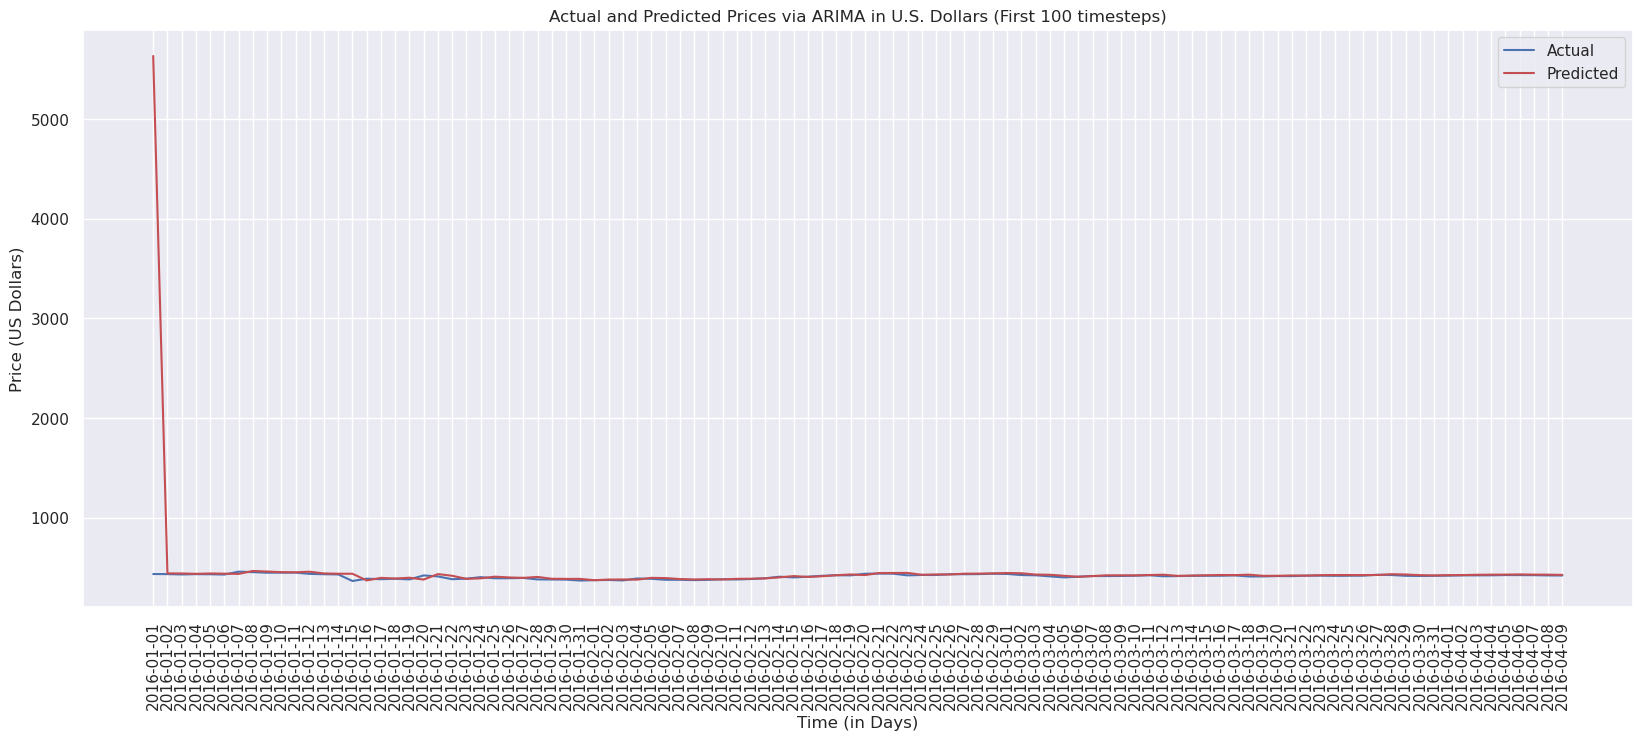

In [ ]:
evaluate_model(arima_model, df)

Evaluating ARIMA model...

Mean Squared Error: 115001.28839181786
Mean Absolute Percentage Error: 3.3305931621476734
Mean Absolute Error: 166.37284963885395


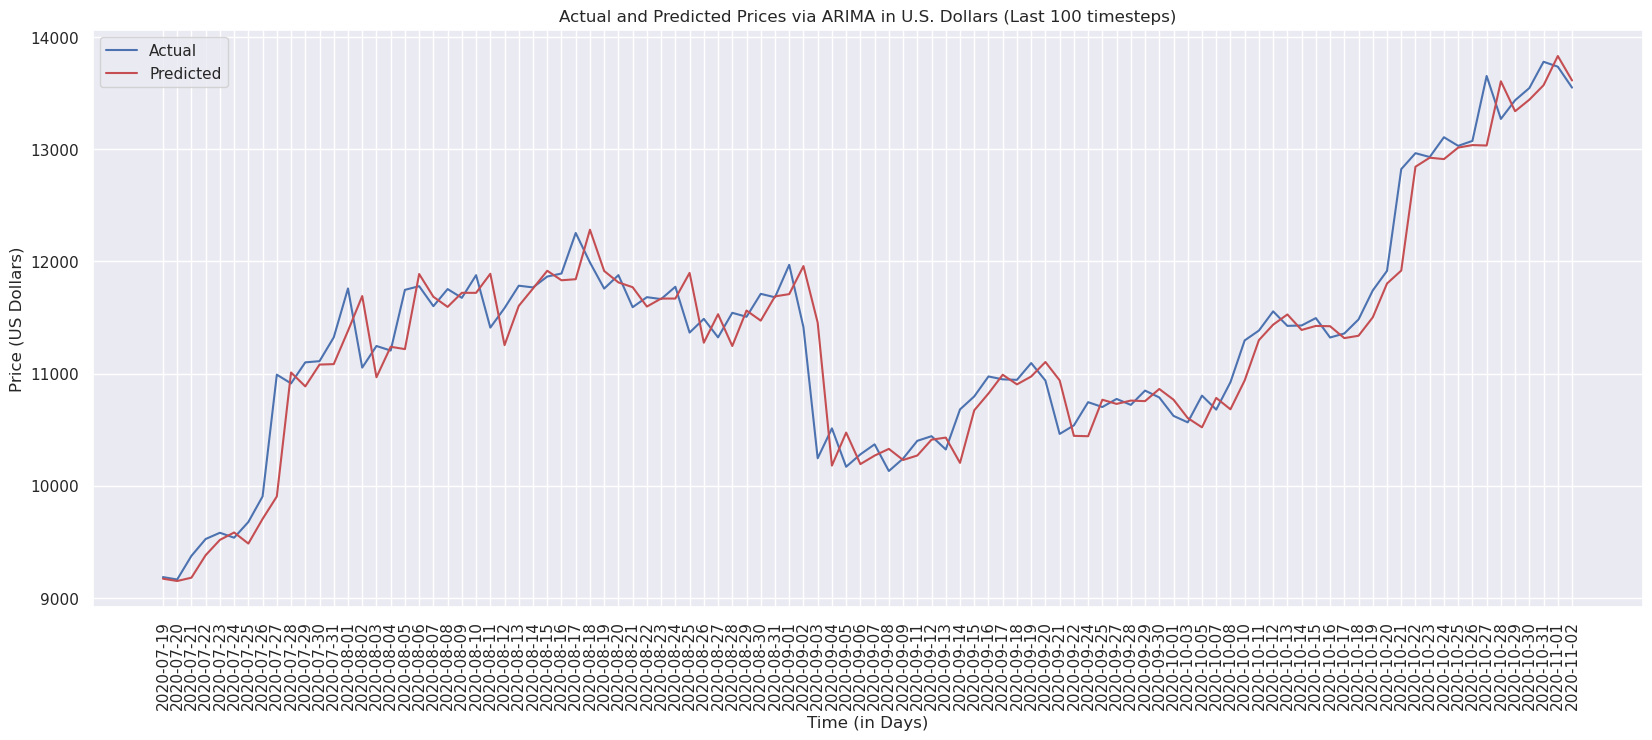

In [ ]:
evaluate_model(arima_model, df, first_timestep = False)

Evaluating SARIMAX model...

Mean Squared Error: 99725.69304582012
Mean Absolute Percentage Error: 2.6552730472110144
Mean Absolute Error: 163.70972396311848


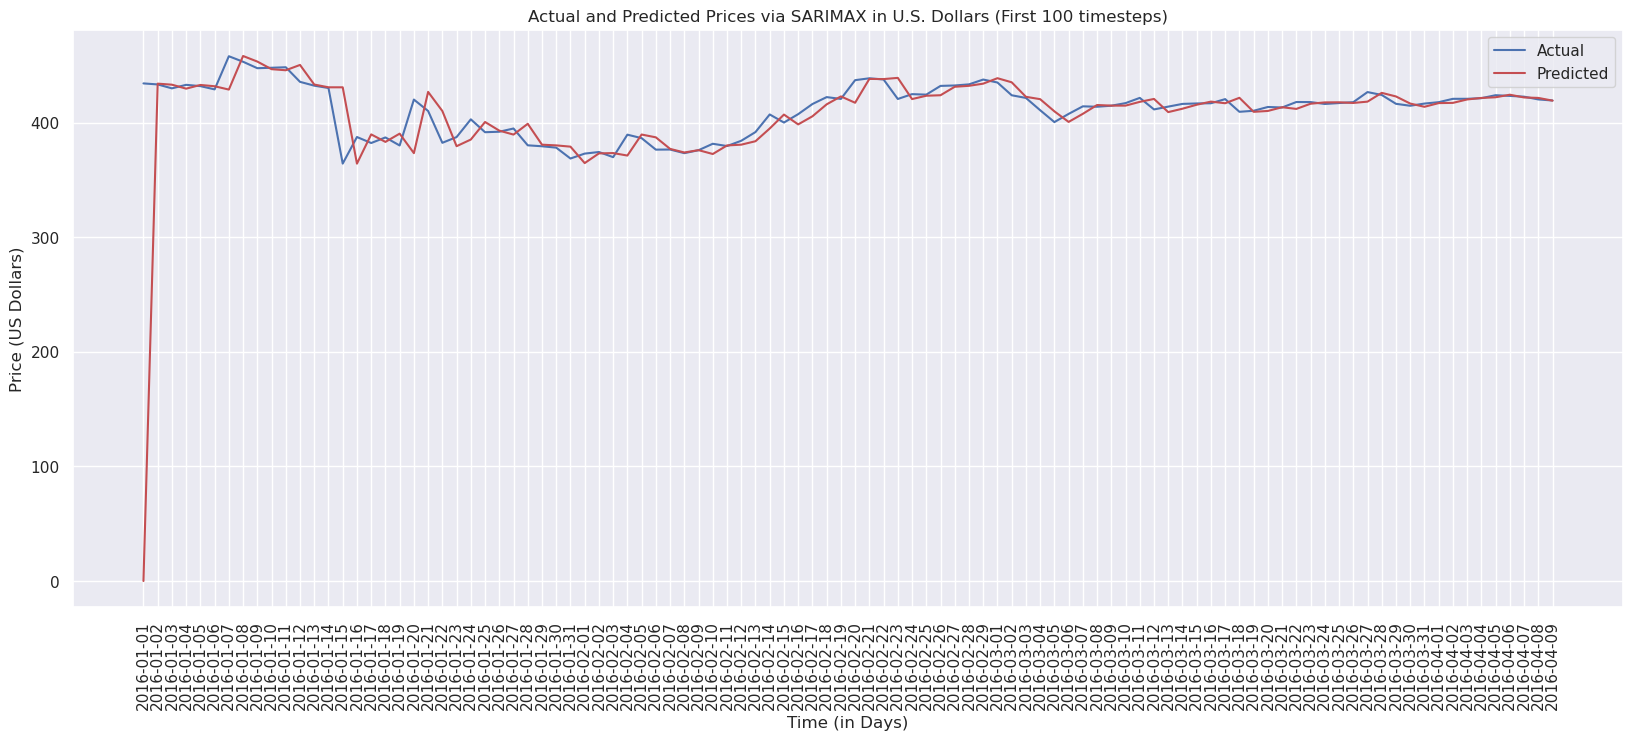

In [ ]:
evaluate_model(sarimax_model, df)

Evaluating SARIMAX model...

Mean Squared Error: 99725.69304582012
Mean Absolute Percentage Error: 2.6552730472110144
Mean Absolute Error: 163.70972396311848


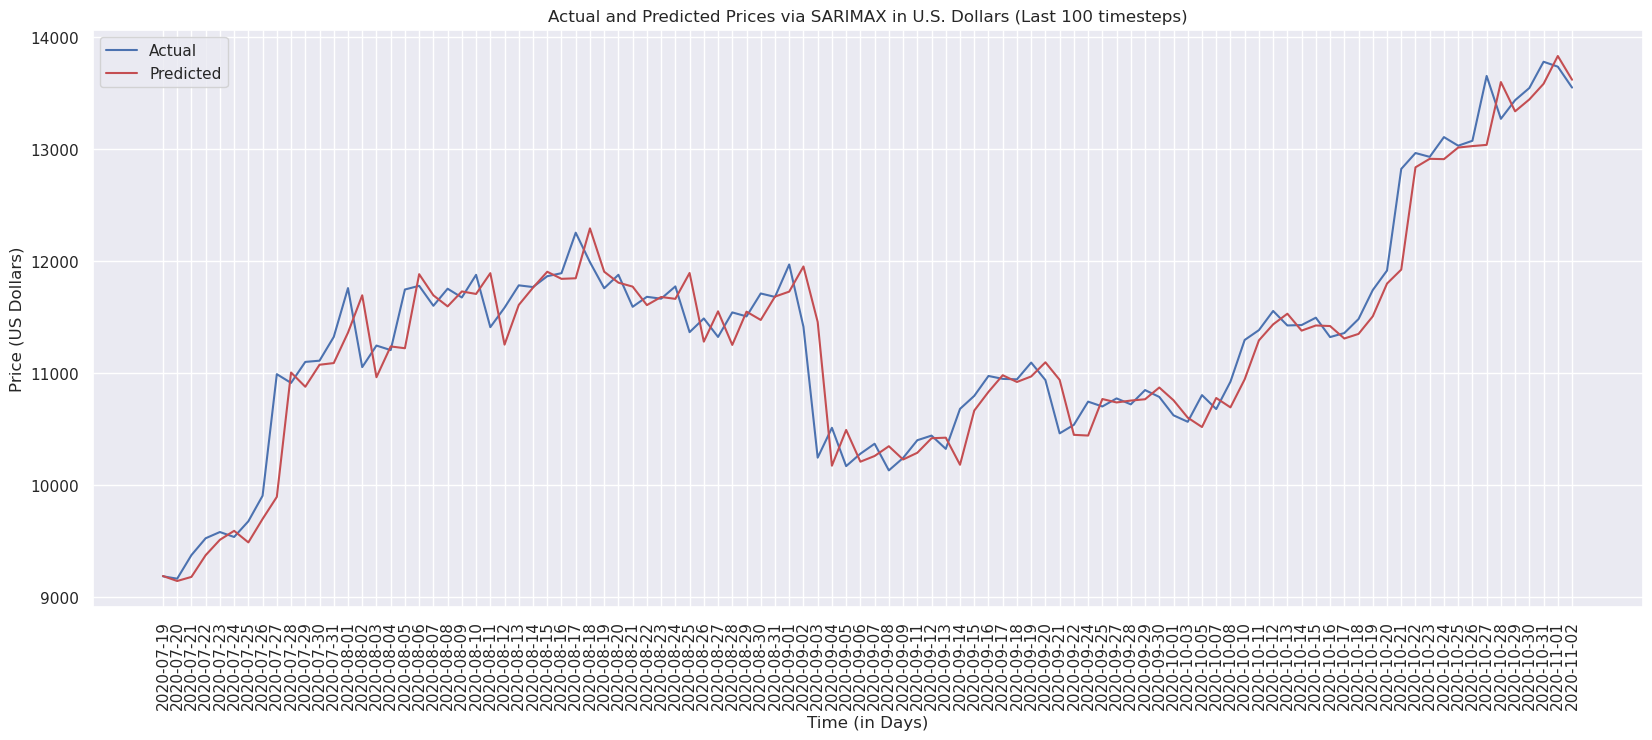

In [ ]:
evaluate_model(sarimax_model, df, first_timestep = False)

Evaluating HoltWinters model...

Mean Squared Error: 102959.74222254365
Mean Absolute Percentage Error: 2.5357270341105265
Mean Absolute Error: 161.5396495730064


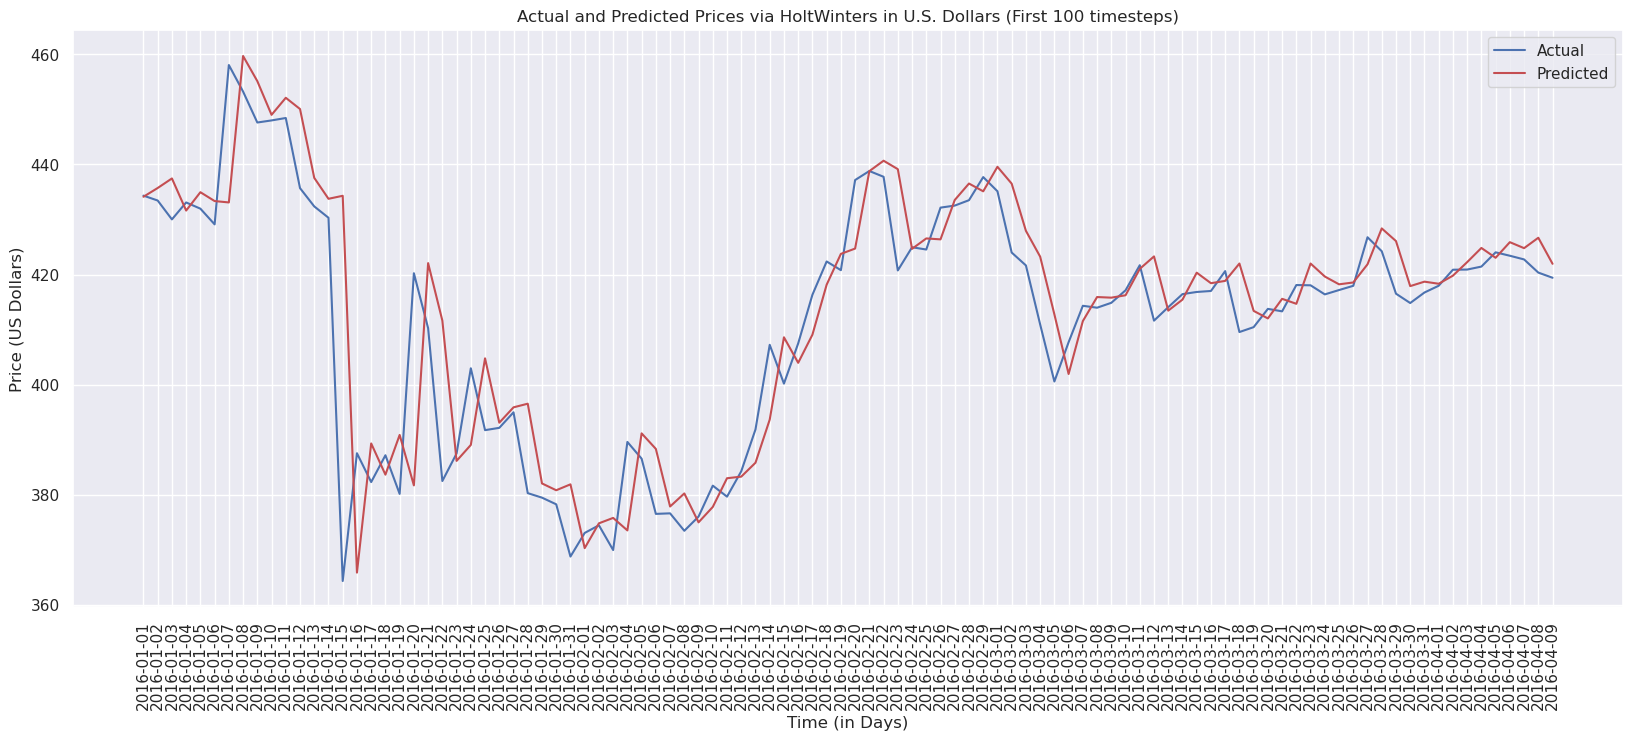

In [ ]:
evaluate_model(holt_model, df)

Evaluating HoltWinters model...

Mean Squared Error: 102959.74222254365
Mean Absolute Percentage Error: 2.5357270341105265
Mean Absolute Error: 161.5396495730064


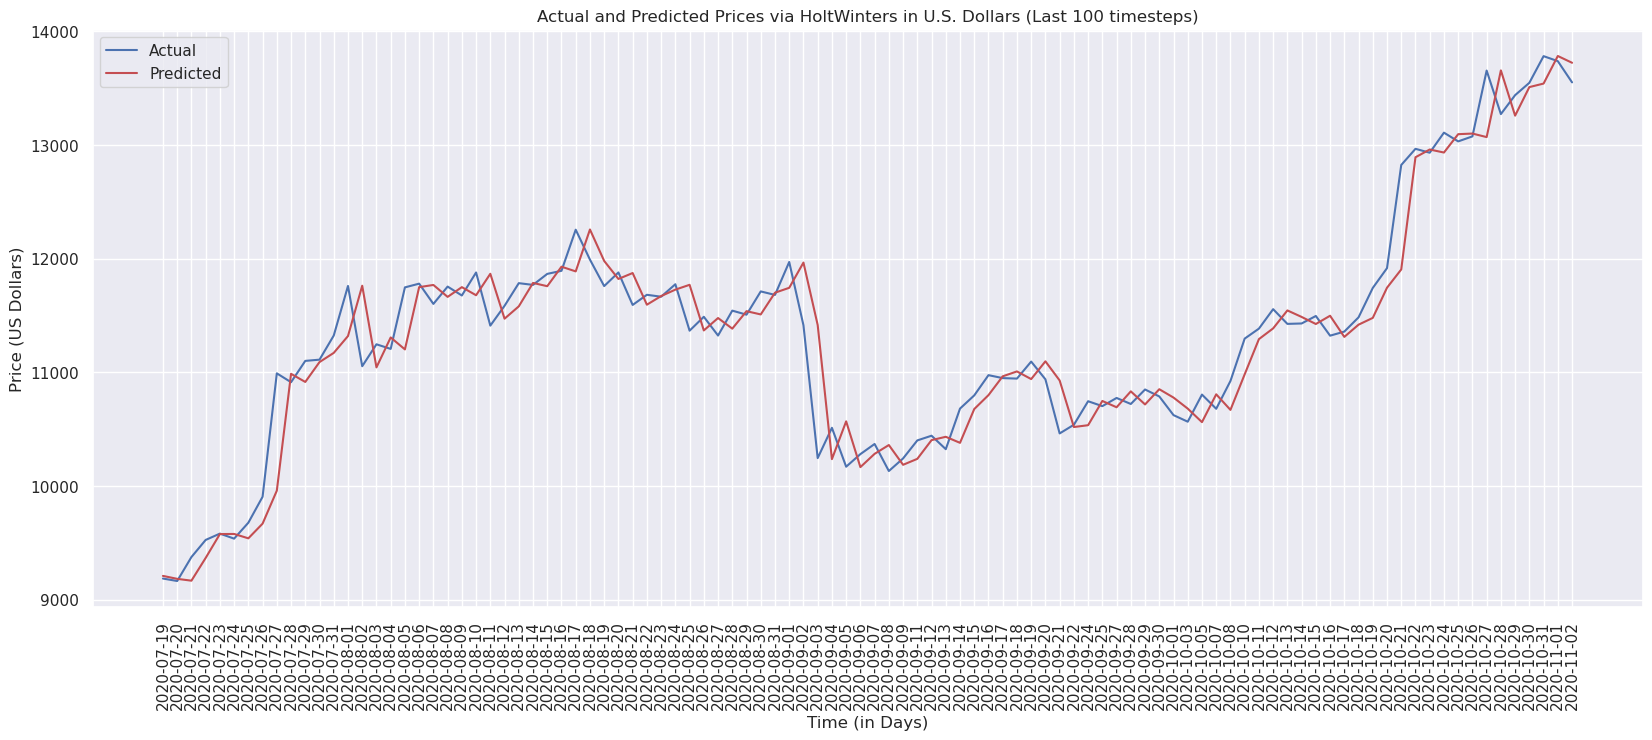

In [ ]:
evaluate_model(holt_model, df, first_timestep = False)

Evaluating ExponentialSmoothing model...

Mean Squared Error: 103306.91853093386
Mean Absolute Percentage Error: 2.7888244118680294
Mean Absolute Error: 163.15842359541452


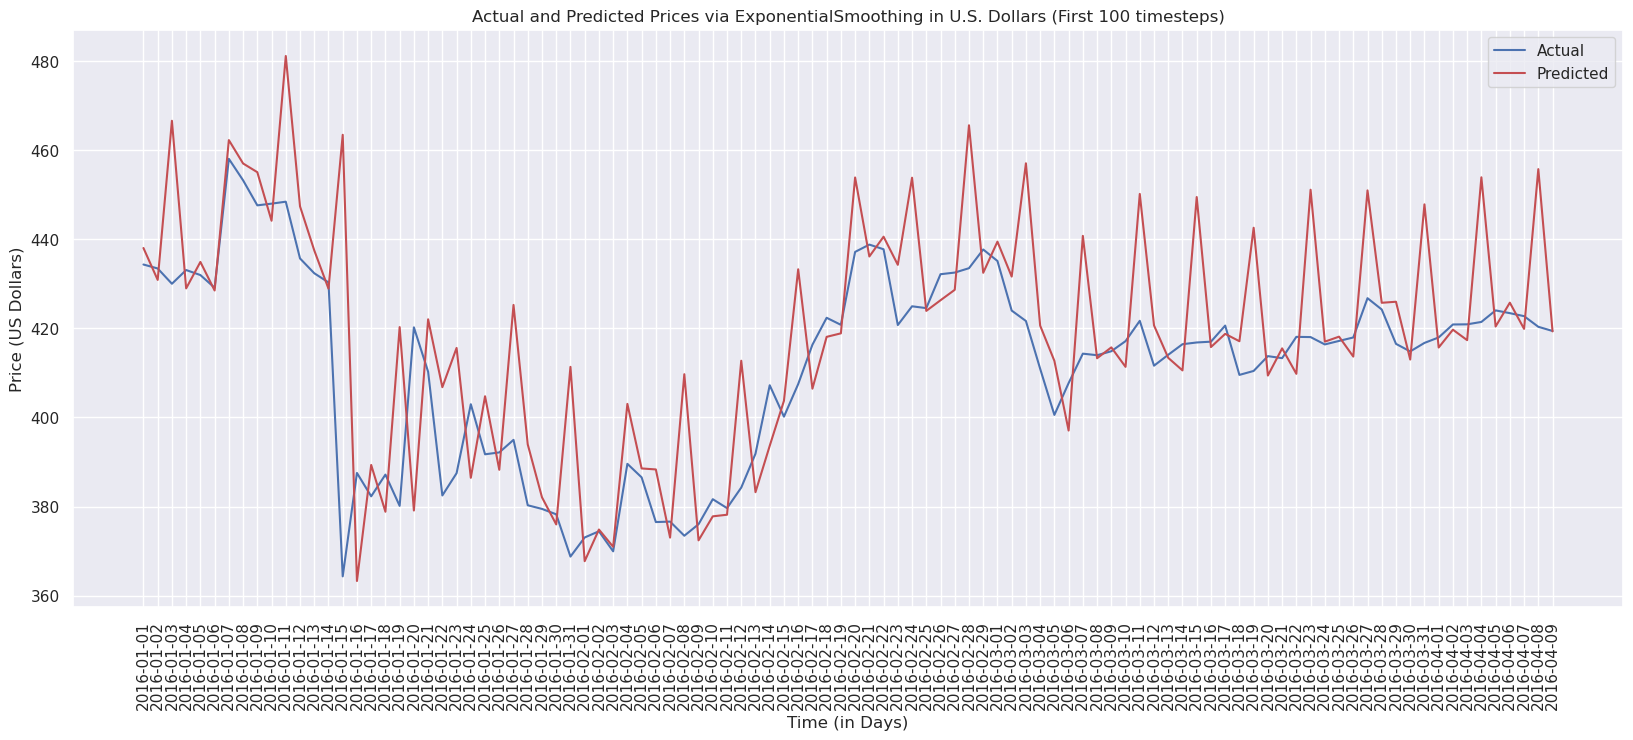

In [ ]:
evaluate_model(exp_model, df)

Evaluating ExponentialSmoothing model...

Mean Squared Error: 103306.91853093386
Mean Absolute Percentage Error: 2.7888244118680294
Mean Absolute Error: 163.15842359541452


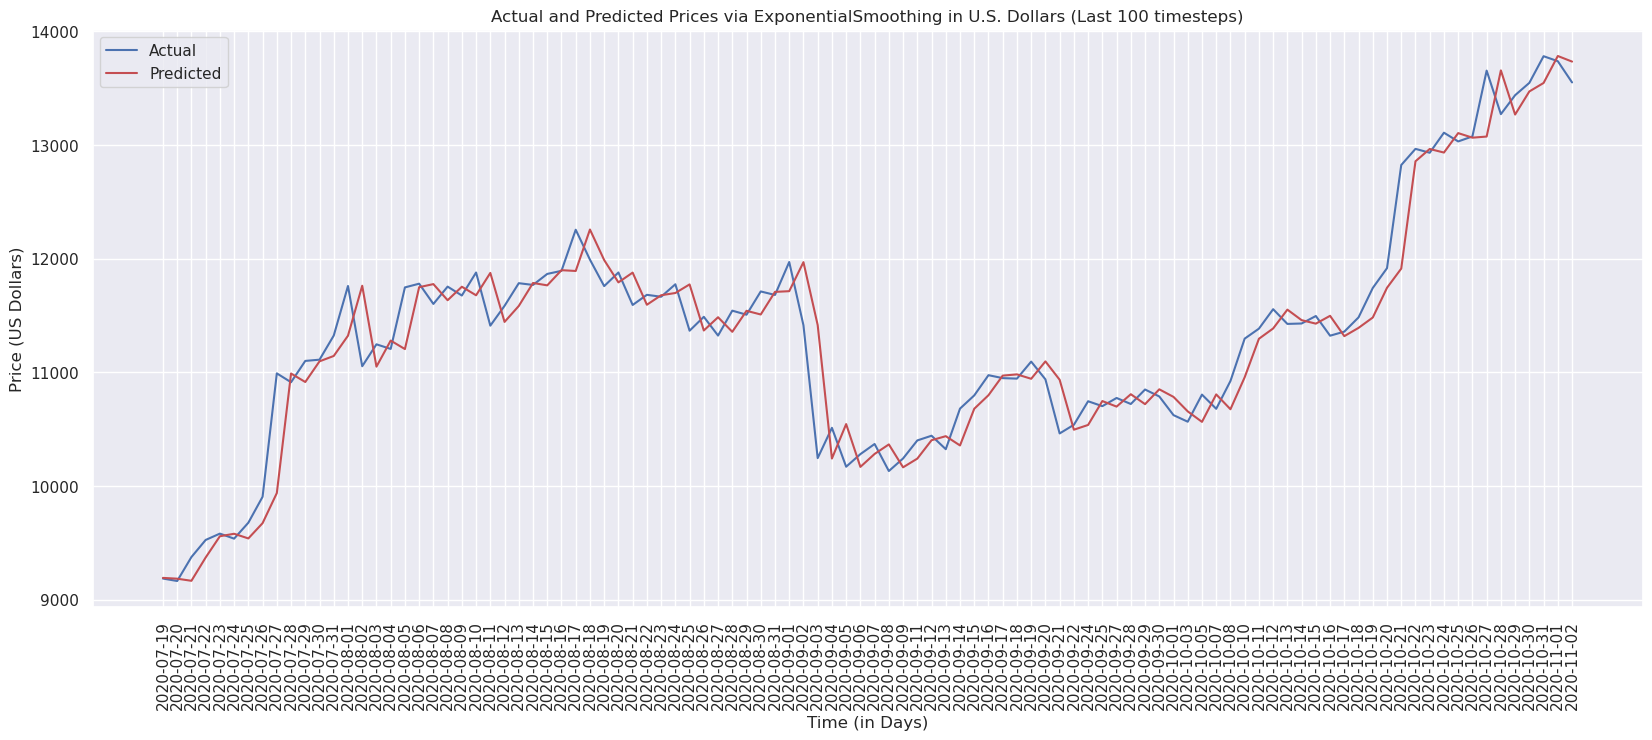

In [ ]:
evaluate_model(exp_model, df, first_timestep = False)

#### 5.3 Performance Analysis



Based on the visualizations and metrics observed from training, it would seem that the _SARIMAX_ model exhibits the most promise based on the metric values, but shows some issues in practice. Over time the fit worsens. However, it would seem that the main issue with the fit is the lag between actual and predicted cryptocurrency prices. This would imply that the SARIMAX model learns the data patterns quite well. More data would likely improve model performance.

The _ARIMA_ model seems to follow the same pattern as the _SARIMAX_, even though both the metric values and the fit seem a little worse. The simple _Exponential Smoothing_ model seems to start out with bad fit, but at the end, the fit improves dramatically, even though it still seems to fall behind the _ARIMA_ and _SARIMAX_ models. The _Holt-Winters exponential smoothing_ model seems to follow the same trend, though it is more stable than the _Exponential Smoothing_ model.


Based on this analysis, the model of choice is the _SARIMAX_ model. This is because:

1. It shows the best promise with respect to the metrics of interest, and
2. It also shows the best promise of being improved with the addition of more data.

---

<div><h3>06. Model Deployment</h3></div>

With the model performance up to speed, the final artefact needs to be deployed for use. There are a number of options. They include:


1. Local Deployment
   * Flask
   * Django
2. Cloud Deployment
   * AWS
   * GCP
   * Streamlit + GitHub


<div align="center"><h3>6.1. Model Deployment Code</h3></div>